# Analysis of COVID-19 Data from The New York Times

*Author: Mark Bauer*  
*Date: March 28, 2020*

The New York Times Github Data [Repository](https://github.com/nytimes/covid-19-data).   
The New York Time [News Article](https://www.nytimes.com/article/coronavirus-county-data-us.html).  
The New York Times COVID-19 US Map: https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html.   
The New York Times COVID-19 Global Map: https://www.nytimes.com/interactive/2020/world/coronavirus-maps.html.

In [167]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
import seaborn as sns
import geopandas as gpd
import zipfile
from zipfile import ZipFile
from io import BytesIO
import os
import zipfile
from zipfile import ZipFile
from os.path import basename
import requests
import urllib
import squarify  

# to Plot matplotlib figures inline on the notebook
%matplotlib inline
sns.set(color_codes=True)

In [168]:
#Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,matplotlib.pyplot,seaborn

CPython 3.7.1
IPython 7.2.0

numpy 1.16.1
pandas 1.0.0
matplotlib 3.0.2
matplotlib.pyplot 3.0.2
seaborn 0.9.0


In [169]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'

covid_19_state_data = pd.read_csv(url)

In [170]:
covid_19_state_data.head(10)

date       state  fips  cases  deaths
0  2020-01-21  Washington    53      1       0
1  2020-01-22  Washington    53      1       0
2  2020-01-23  Washington    53      1       0
3  2020-01-24    Illinois    17      1       0
4  2020-01-24  Washington    53      1       0
5  2020-01-25  California     6      1       0
6  2020-01-25    Illinois    17      1       0
7  2020-01-25  Washington    53      1       0
8  2020-01-26     Arizona     4      1       0
9  2020-01-26  California     6      2       0

In [171]:
table = covid_19_state_data.sort_values(by=['date', 'cases'], 
                                ascending=[False, False]).drop_duplicates(subset ="state", 
                                keep = 'first').reset_index(drop=True).head(10)

table['cases'] = table['cases'].map('{:,}'.format)
table['deaths'] = table['deaths'].map('{:,}'.format)
table.drop('fips', axis=1, inplace=True)
                 
print(table.to_markdown())

|    | date       | state         | cases   | deaths   |
|---:|:-----------|:--------------|:--------|:---------|
|  0 | 2020-04-09 | New York      | 159,937 | 7,067    |
|  1 | 2020-04-09 | New Jersey    | 51,027  | 1,700    |
|  2 | 2020-04-09 | Michigan      | 21,375  | 1,076    |
|  3 | 2020-04-09 | California    | 20,191  | 548      |
|  4 | 2020-04-09 | Massachusetts | 18,941  | 503      |
|  5 | 2020-04-09 | Pennsylvania  | 18,379  | 344      |
|  6 | 2020-04-09 | Louisiana     | 18,283  | 702      |
|  7 | 2020-04-09 | Florida       | 16,819  | 370      |
|  8 | 2020-04-09 | Illinois      | 16,422  | 534      |
|  9 | 2020-04-09 | Texas         | 11,372  | 228      |


In [172]:
covid_19_state_data.shape

(2105, 5)

In [173]:
print('New York Times COVID-19 data as of', covid_19_state_data.sort_values(by='date', 
                                   ascending=False)['date'].iloc[0])

New York Times COVID-19 data as of 2020-04-09


In [174]:
current_date = covid_19_state_data.sort_values(by='date', ascending=False)['date'].iloc[0]

In [175]:
print('The current date of this notebook is', current_date)

The current date of this notebook is 2020-04-09


In [176]:
covid_19_state_data.date = pd.to_datetime(covid_19_state_data.date, infer_datetime_format=True)

In [177]:
covid_19_state_data.dtypes

date      datetime64[ns]
state             object
fips               int64
cases              int64
deaths             int64
dtype: object

In [178]:
drop_duplicates = covid_19_state_data.sort_values(by="cases", ascending=False).drop_duplicates(
                                                    subset ="state", keep = 'first')
top_10 = drop_duplicates[0:10]
top10_list = list(top_10.state)
top_10  = covid_19_state_data.loc[covid_19_state_data['state'].isin(top10_list)]

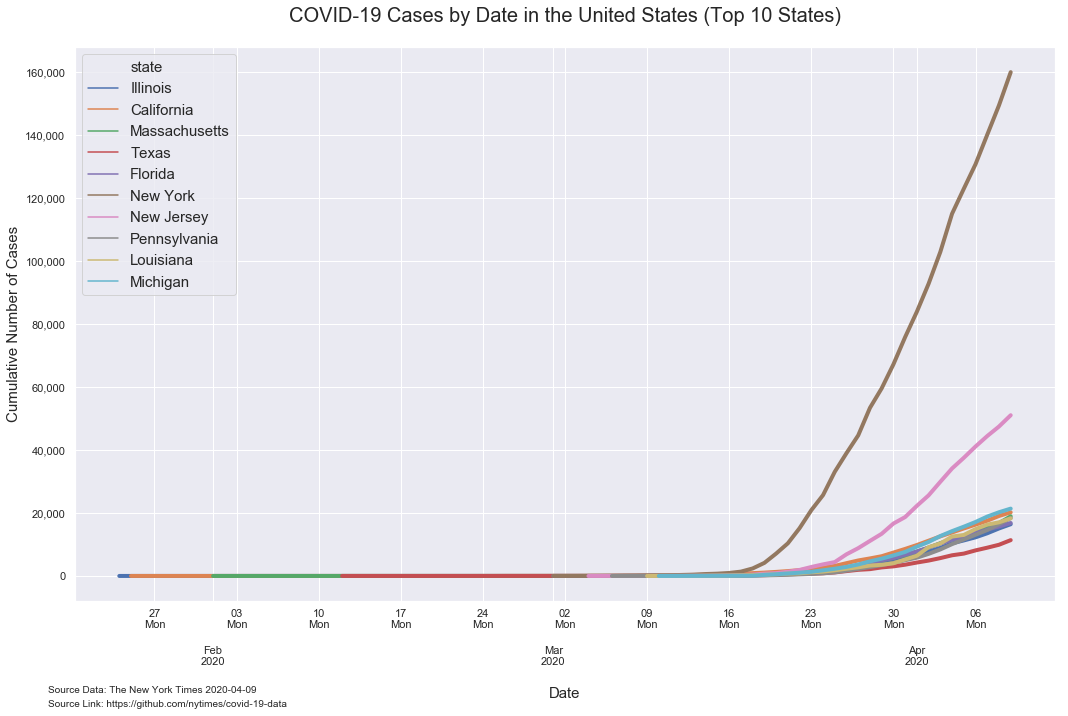

In [179]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="date", y="cases",
             hue="state",
             data=top_10, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Cases', fontsize=15)
plt.title('COVID-19 Cases by Date in the United States (Top 10 States)', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries')

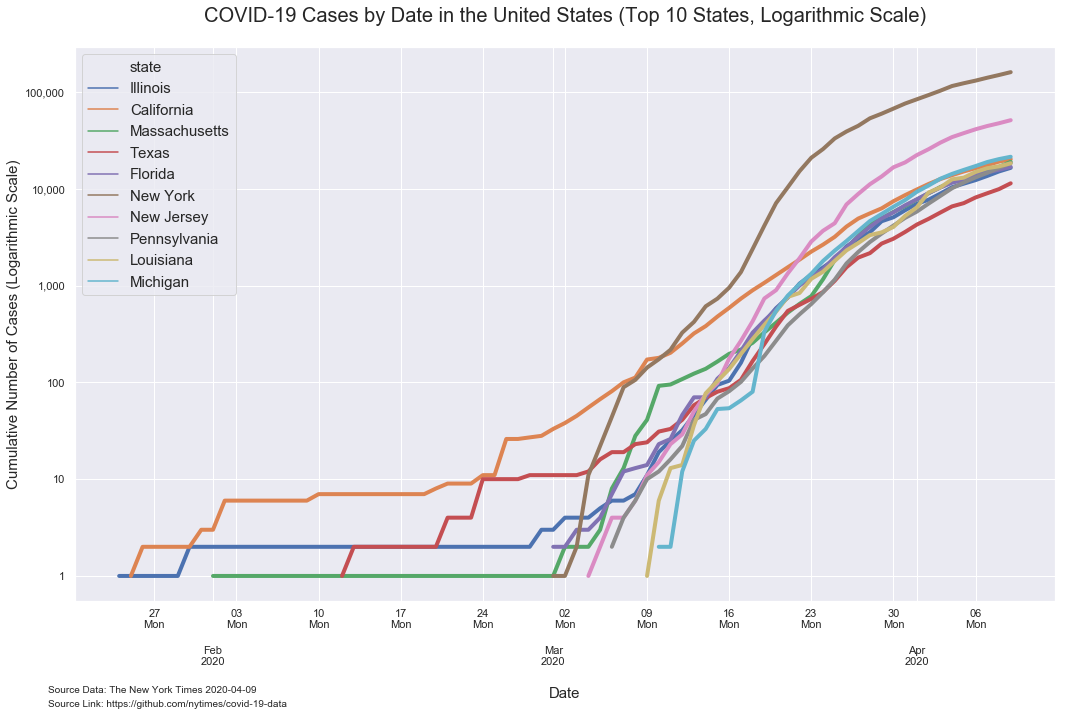

In [180]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="date", y="cases",
             hue="state",
             data=top_10, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Cases (Logarithmic Scale)', fontsize=15)
plt.title('COVID-19 Cases by Date in the United States (Top 10 States, Logarithmic Scale)', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-log')

# Date to 10 Cases

In [181]:
state_ten_cases = top_10.loc[top_10.cases >= 10]

In [182]:
state_ten_cases = state_ten_cases.sort_values(by=['date', 'cases'], 
                                              ascending=[True, True]).drop_duplicates(subset ="state", 
                                                                                      keep = 'first').reset_index(drop=True)

In [183]:
state_ten_cases = state_ten_cases[['date', 'state']]
state_ten_cases.rename(columns={'date': 'date_ten_case'}, inplace=True)

In [184]:
state_ten_cases

date_ten_case          state
0    2020-02-24          Texas
1    2020-02-24     California
2    2020-03-04       New York
3    2020-03-07        Florida
4    2020-03-07  Massachusetts
5    2020-03-09   Pennsylvania
6    2020-03-09       Illinois
7    2020-03-09     New Jersey
8    2020-03-11      Louisiana
9    2020-03-12       Michigan

In [185]:
state_ten_cases = top_10.merge(state_ten_cases, left_on='state', right_on='state')

In [186]:
state_ten_cases

date     state  fips  cases  deaths date_ten_case
0   2020-01-24  Illinois    17      1       0    2020-03-09
1   2020-01-25  Illinois    17      1       0    2020-03-09
2   2020-01-26  Illinois    17      1       0    2020-03-09
3   2020-01-27  Illinois    17      1       0    2020-03-09
4   2020-01-28  Illinois    17      1       0    2020-03-09
..         ...       ...   ...    ...     ...           ...
490 2020-04-05  Michigan    26  15635     616    2020-03-12
491 2020-04-06  Michigan    26  17130     727    2020-03-12
492 2020-04-07  Michigan    26  18852     845    2020-03-12
493 2020-04-08  Michigan    26  20220     959    2020-03-12
494 2020-04-09  Michigan    26  21375    1076    2020-03-12

[495 rows x 6 columns]

In [187]:
state_ten_cases = state_ten_cases.loc[state_ten_cases.cases >= 10]

In [188]:
state_ten_cases

date     state  fips  cases  deaths date_ten_case
45  2020-03-09  Illinois    17     11       0    2020-03-09
46  2020-03-10  Illinois    17     19       0    2020-03-09
47  2020-03-11  Illinois    17     25       0    2020-03-09
48  2020-03-12  Illinois    17     32       0    2020-03-09
49  2020-03-13  Illinois    17     46       0    2020-03-09
..         ...       ...   ...    ...     ...           ...
490 2020-04-05  Michigan    26  15635     616    2020-03-12
491 2020-04-06  Michigan    26  17130     727    2020-03-12
492 2020-04-07  Michigan    26  18852     845    2020-03-12
493 2020-04-08  Michigan    26  20220     959    2020-03-12
494 2020-04-09  Michigan    26  21375    1076    2020-03-12

[352 rows x 6 columns]

In [189]:
state_ten_cases['days_since_ten_case'] = (state_ten_cases['date'] - 
                                      state_ten_cases['date_ten_case']).dt.days

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [190]:
state_ten_cases

date     state  fips  cases  deaths date_ten_case  \
45  2020-03-09  Illinois    17     11       0    2020-03-09   
46  2020-03-10  Illinois    17     19       0    2020-03-09   
47  2020-03-11  Illinois    17     25       0    2020-03-09   
48  2020-03-12  Illinois    17     32       0    2020-03-09   
49  2020-03-13  Illinois    17     46       0    2020-03-09   
..         ...       ...   ...    ...     ...           ...   
490 2020-04-05  Michigan    26  15635     616    2020-03-12   
491 2020-04-06  Michigan    26  17130     727    2020-03-12   
492 2020-04-07  Michigan    26  18852     845    2020-03-12   
493 2020-04-08  Michigan    26  20220     959    2020-03-12   
494 2020-04-09  Michigan    26  21375    1076    2020-03-12   

     days_since_ten_case  
45                     0  
46                     1  
47                     2  
48                     3  
49                     4  
..                   ...  
490                   24  
491                   25  
492                   26  
493                   27  
494                   28  

[352 rows x 7 columns]

# Daily Number of Cases Since 10th Case

In [191]:
state_ten_cases['daily_cases'] = (state_ten_cases.cases -
                                state_ten_cases.cases.shift(1))

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [192]:
state_ten_cases[:50]

date       state  fips  cases  deaths date_ten_case  \
45  2020-03-09    Illinois    17     11       0    2020-03-09   
46  2020-03-10    Illinois    17     19       0    2020-03-09   
47  2020-03-11    Illinois    17     25       0    2020-03-09   
48  2020-03-12    Illinois    17     32       0    2020-03-09   
49  2020-03-13    Illinois    17     46       0    2020-03-09   
50  2020-03-14    Illinois    17     66       0    2020-03-09   
51  2020-03-15    Illinois    17     94       0    2020-03-09   
52  2020-03-16    Illinois    17    104       0    2020-03-09   
53  2020-03-17    Illinois    17    159       1    2020-03-09   
54  2020-03-18    Illinois    17    286       1    2020-03-09   
55  2020-03-19    Illinois    17    420       4    2020-03-09   
56  2020-03-20    Illinois    17    583       5    2020-03-09   
57  2020-03-21    Illinois    17    751       6    2020-03-09   
58  2020-03-22    Illinois    17   1047       9    2020-03-09   
59  2020-03-23    Illinois    17   1285      12    2020-03-09   
60  2020-03-24    Illinois    17   1535      16    2020-03-09   
61  2020-03-25    Illinois    17   1875      21    2020-03-09   
62  2020-03-26    Illinois    17   2538      26    2020-03-09   
63  2020-03-27    Illinois    17   3029      37    2020-03-09   
64  2020-03-28    Illinois    17   3547      50    2020-03-09   
65  2020-03-29    Illinois    17   4613      70    2020-03-09   
66  2020-03-30    Illinois    17   5070      84    2020-03-09   
67  2020-03-31    Illinois    17   5994     107    2020-03-09   
68  2020-04-01    Illinois    17   6980     146    2020-03-09   
69  2020-04-02    Illinois    17   7695     165    2020-03-09   
70  2020-04-03    Illinois    17   8904     211    2020-03-09   
71  2020-04-04    Illinois    17  10357     248    2020-03-09   
72  2020-04-05    Illinois    17  11276     282    2020-03-09   
73  2020-04-06    Illinois    17  12262     309    2020-03-09   
74  2020-04-07    Illinois    17  13549     384    2020-03-09   
75  2020-04-08    Illinois    17  15078     464    2020-03-09   
76  2020-04-09    Illinois    17  16422     534    2020-03-09   
107 2020-02-24  California     6     11       0    2020-02-24   
108 2020-02-25  California     6     11       0    2020-02-24   
109 2020-02-26  California     6     26       0    2020-02-24   
110 2020-02-27  California     6     26       0    2020-02-24   
111 2020-02-28  California     6     27       0    2020-02-24   
112 2020-02-29  California     6     28       0    2020-02-24   
113 2020-03-01  California     6     33       0    2020-02-24   
114 2020-03-02  California     6     38       0    2020-02-24   
115 2020-03-03  California     6     45       0    2020-02-24   
116 2020-03-04  California     6     55       1    2020-02-24   
117 2020-03-05  California     6     67       1    2020-02-24   
118 2020-03-06  California     6     81       1    2020-02-24   
119 2020-03-07  California     6    100       1    2020-02-24   
120 2020-03-08  California     6    112       1    2020-02-24   
121 2020-03-09  California     6    172       2    2020-02-24   
122 2020-03-10  California     6    179       3    2020-02-24   
123 2020-03-11  California     6    202       4    2020-02-24   
124 2020-03-12  California     6    252       4    2020-02-24   

     days_since_ten_case  daily_cases  
45                     0          NaN  
46                     1          8.0  
47                     2          6.0  
48                     3          7.0  
49                     4         14.0  
50                     5         20.0  
51                     6         28.0  
52                     7         10.0  
53                     8         55.0  
54                     9        127.0  
55                    10        134.0  
56                    11        163.0  
57                    12        168.0  
58                    13        296.0  
59                    14        238.0  
60                    15        250.0  
61            

In [193]:
state_ten_cases.columns

Index(['date', 'state', 'fips', 'cases', 'deaths', 'date_ten_case',
       'days_since_ten_case', 'daily_cases'],
      dtype='object')

In [194]:
state_ten_cases = state_ten_cases[['date', 'state', 'cases',  
                                   'daily_cases', 'deaths', 'date_ten_case','days_since_ten_case']]

In [195]:
state_ten_cases[250:300]

date         state  cases  daily_cases  deaths date_ten_case  \
386 2020-03-30    New Jersey  16636       3250.0     199    2020-03-09   
387 2020-03-31    New Jersey  18696       2060.0     267    2020-03-09   
388 2020-04-01    New Jersey  22255       3559.0     355    2020-03-09   
389 2020-04-02    New Jersey  25590       3335.0     539    2020-03-09   
390 2020-04-03    New Jersey  29895       4305.0     647    2020-03-09   
391 2020-04-04    New Jersey  34124       4229.0     847    2020-03-09   
392 2020-04-05    New Jersey  37505       3381.0     917    2020-03-09   
393 2020-04-06    New Jersey  41090       3585.0    1005    2020-03-09   
394 2020-04-07    New Jersey  44416       3326.0    1232    2020-03-09   
395 2020-04-08    New Jersey  47437       3021.0    1504    2020-03-09   
396 2020-04-09    New Jersey  51027       3590.0    1700    2020-03-09   
400 2020-03-09  Pennsylvania     10     -51017.0       0    2020-03-09   
401 2020-03-10  Pennsylvania     12          2.0       0    2020-03-09   
402 2020-03-11  Pennsylvania     16          4.0       0    2020-03-09   
403 2020-03-12  Pennsylvania     22          6.0       0    2020-03-09   
404 2020-03-13  Pennsylvania     41         19.0       0    2020-03-09   
405 2020-03-14  Pennsylvania     47          6.0       0    2020-03-09   
406 2020-03-15  Pennsylvania     68         21.0       0    2020-03-09   
407 2020-03-16  Pennsylvania     81         13.0       0    2020-03-09   
408 2020-03-17  Pennsylvania    101         20.0       0    2020-03-09   
409 2020-03-18  Pennsylvania    139         38.0       1    2020-03-09   
410 2020-03-19  Pennsylvania    187         48.0       1    2020-03-09   
411 2020-03-20  Pennsylvania    269         82.0       1    2020-03-09   
412 2020-03-21  Pennsylvania    388        119.0       2    2020-03-09   
413 2020-03-22  Pennsylvania    504        116.0       3    2020-03-09   
414 2020-03-23  Pennsylvania    644        140.0       6    2020-03-09   
415 2020-03-24  Pennsylvania    851        207.0       7    2020-03-09   
416 2020-03-25  Pennsylvania   1151        300.0      11    2020-03-09   
417 2020-03-26  Pennsylvania   1690        539.0      16    2020-03-09   
418 2020-03-27  Pennsylvania   2218        528.0      23    2020-03-09   
419 2020-03-28  Pennsylvania   2815        597.0      35    2020-03-09   
420 2020-03-29  Pennsylvania   3441        626.0      40    2020-03-09   
421 2020-03-30  Pennsylvania   4156        715.0      48    2020-03-09   
422 2020-03-31  Pennsylvania   4997        841.0      72    2020-03-09   
423 2020-04-01  Pennsylvania   5805        808.0      74    2020-03-09   
424 2020-04-02  Pennsylvania   7016       1211.0      90    2020-03-09   
425 2020-04-03  Pennsylvania   8420       1404.0     102    2020-03-09   
426 2020-04-04  Pennsylvania  10109       1689.0     139    2020-03-09   
427 2020-04-05  Pennsylvania  11589       1480.0     159    2020-03-09   
428 2020-04-06  Pennsylvania  13074       1485.0     169    2020-03-09   
429 2020-04-07  Pennsylvania  14582       1508.0     240    2020-03-09   
430 2020-04-08  Pennsylvania  16414       1832.0     313    2020-03-09   
431 2020-04-09  Pennsylvania  18379       1965.0     344    2020-03-09   
434 2020-03-11     Louisiana     13     -18366.0       0    2020-03-11   
435 2020-03-12     Louisiana     14          1.0       0    2020-03-11   
436 2020-03-13     Louisiana     36         22.0       0    2020-03-11   
437 2020-03-14     Louisiana     77         41.0       1    2020-03-11   
438 2020-03-15     Louisiana    103         26.0       2    2020-03-11   
439 2020-03-16     Louisiana    137         34.0       3    2020-03-11   
440 2020-03-17     Louisiana    196         59.0       5    2020-03-11   

     days_since_ten_case  
386                   21  
387                   22  
388                   23  
389                   24  
390                   25  
391                   26  
392                   27  
393                

In [196]:
state_ten_cases['daily_cases'].loc[state_ten_cases.daily_cases < 0] = state_ten_cases['cases']

/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
state_ten_cases['daily_cases'].loc[state_ten_cases.daily_cases.isnull()] = state_ten_cases['cases']

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [198]:
state_ten_cases[:50]

date       state  cases  daily_cases  deaths date_ten_case  \
45  2020-03-09    Illinois     11         11.0       0    2020-03-09   
46  2020-03-10    Illinois     19          8.0       0    2020-03-09   
47  2020-03-11    Illinois     25          6.0       0    2020-03-09   
48  2020-03-12    Illinois     32          7.0       0    2020-03-09   
49  2020-03-13    Illinois     46         14.0       0    2020-03-09   
50  2020-03-14    Illinois     66         20.0       0    2020-03-09   
51  2020-03-15    Illinois     94         28.0       0    2020-03-09   
52  2020-03-16    Illinois    104         10.0       0    2020-03-09   
53  2020-03-17    Illinois    159         55.0       1    2020-03-09   
54  2020-03-18    Illinois    286        127.0       1    2020-03-09   
55  2020-03-19    Illinois    420        134.0       4    2020-03-09   
56  2020-03-20    Illinois    583        163.0       5    2020-03-09   
57  2020-03-21    Illinois    751        168.0       6    2020-03-09   
58  2020-03-22    Illinois   1047        296.0       9    2020-03-09   
59  2020-03-23    Illinois   1285        238.0      12    2020-03-09   
60  2020-03-24    Illinois   1535        250.0      16    2020-03-09   
61  2020-03-25    Illinois   1875        340.0      21    2020-03-09   
62  2020-03-26    Illinois   2538        663.0      26    2020-03-09   
63  2020-03-27    Illinois   3029        491.0      37    2020-03-09   
64  2020-03-28    Illinois   3547        518.0      50    2020-03-09   
65  2020-03-29    Illinois   4613       1066.0      70    2020-03-09   
66  2020-03-30    Illinois   5070        457.0      84    2020-03-09   
67  2020-03-31    Illinois   5994        924.0     107    2020-03-09   
68  2020-04-01    Illinois   6980        986.0     146    2020-03-09   
69  2020-04-02    Illinois   7695        715.0     165    2020-03-09   
70  2020-04-03    Illinois   8904       1209.0     211    2020-03-09   
71  2020-04-04    Illinois  10357       1453.0     248    2020-03-09   
72  2020-04-05    Illinois  11276        919.0     282    2020-03-09   
73  2020-04-06    Illinois  12262        986.0     309    2020-03-09   
74  2020-04-07    Illinois  13549       1287.0     384    2020-03-09   
75  2020-04-08    Illinois  15078       1529.0     464    2020-03-09   
76  2020-04-09    Illinois  16422       1344.0     534    2020-03-09   
107 2020-02-24  California     11         11.0       0    2020-02-24   
108 2020-02-25  California     11          0.0       0    2020-02-24   
109 2020-02-26  California     26         15.0       0    2020-02-24   
110 2020-02-27  California     26          0.0       0    2020-02-24   
111 2020-02-28  California     27          1.0       0    2020-02-24   
112 2020-02-29  California     28          1.0       0    2020-02-24   
113 2020-03-01  California     33          5.0       0    2020-02-24   
114 2020-03-02  California     38          5.0       0    2020-02-24   
115 2020-03-03  California     45          7.0       0    2020-02-24   
116 2020-03-04  California     55         10.0       1    2020-02-24   
117 2020-03-05  California     67         12.0       1    2020-02-24   
118 2020-03-06  California     81         14.0       1    2020-02-24   
119 2020-03-07  California    100         19.0       1    2020-02-24   
120 2020-03-08  California    112         12.0       1    2020-02-24   
121 2020-03-09  California    172         60.0       2    2020-02-24   
122 2020-03-10  California    179          7.0       3    2020-02-24   
123 2020-03-11  California    202         23.0       4    2020-02-24   
124 2020-03-12  California    252         50.0       4    2020-02-24   

     days_since_ten_case  
45                     0  
46                     1  
47                     2  
48                     3  
49                     4  
50                     5  
51                     6  
52                     7  
53                     8  
54                     9  
55                    10  
56           

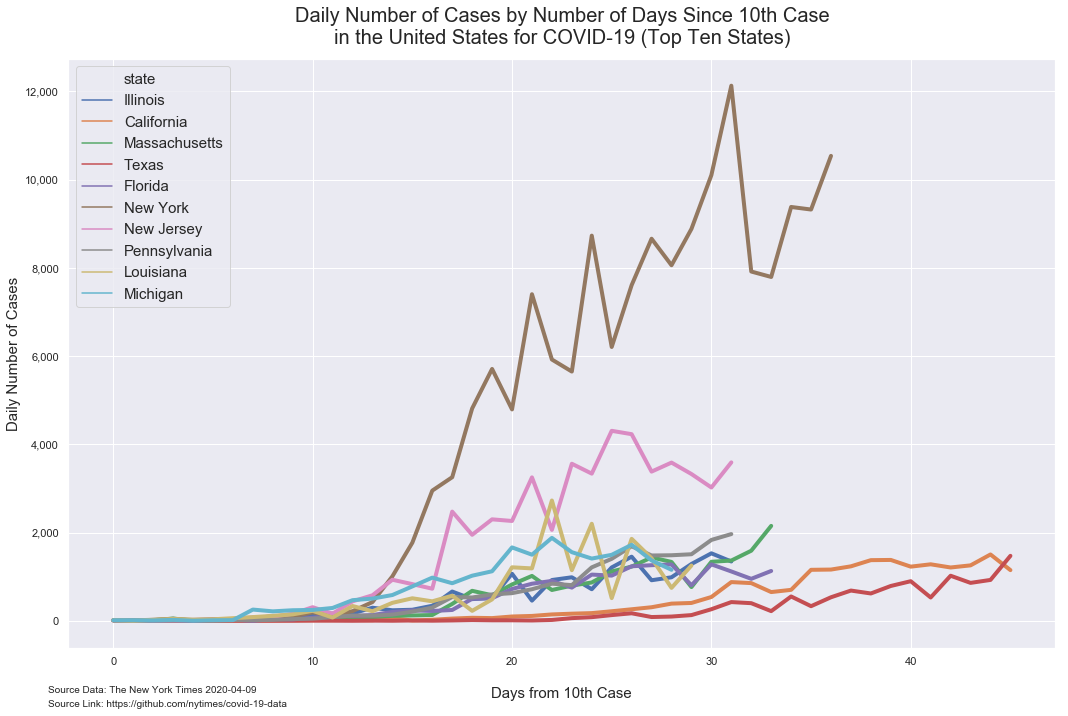

In [199]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_since_ten_case", y="daily_cases",
             hue="state",
             data=state_ten_cases, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Daily Number of Cases', fontsize=15)
plt.title('Daily Number of Cases by Number of Days Since 10th Case\nin the United States for COVID-19 (Top Ten States)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state-top-10-daily')

In [200]:
state_ten_cases['daily_cases'].loc[state_ten_cases.daily_cases == 0]

108    0.0
110    0.0
235    0.0
236    0.0
237    0.0
239    0.0
240    0.0
241    0.0
242    0.0
246    0.0
293    0.0
Name: daily_cases, dtype: float64

In [201]:
temp_fill_zeros = state_ten_cases.sort_values(by=['state', 'date','cases'], 
                                                 ascending=[True, True, True])

temp_fill_zeros['daily_cases'].loc[state_ten_cases.daily_cases == 0] = 1

temp_fill_zeros

date       state  cases  daily_cases  deaths date_ten_case  \
107 2020-02-24  California     11         11.0       0    2020-02-24   
108 2020-02-25  California     11          1.0       0    2020-02-24   
109 2020-02-26  California     26         15.0       0    2020-02-24   
110 2020-02-27  California     26          1.0       0    2020-02-24   
111 2020-02-28  California     27          1.0       0    2020-02-24   
..         ...         ...    ...          ...     ...           ...   
275 2020-04-05       Texas   7094        528.0     137    2020-02-24   
276 2020-04-06       Texas   8115       1021.0     160    2020-02-24   
277 2020-04-07       Texas   8974        859.0     178    2020-02-24   
278 2020-04-08       Texas   9900        926.0     195    2020-02-24   
279 2020-04-09       Texas  11372       1472.0     228    2020-02-24   

     days_since_ten_case  
107                    0  
108                    1  
109                    2  
110                    3  
111                    4  
..                   ...  
275                   41  
276                   42  
277                   43  
278                   44  
279                   45  

[352 rows x 7 columns]

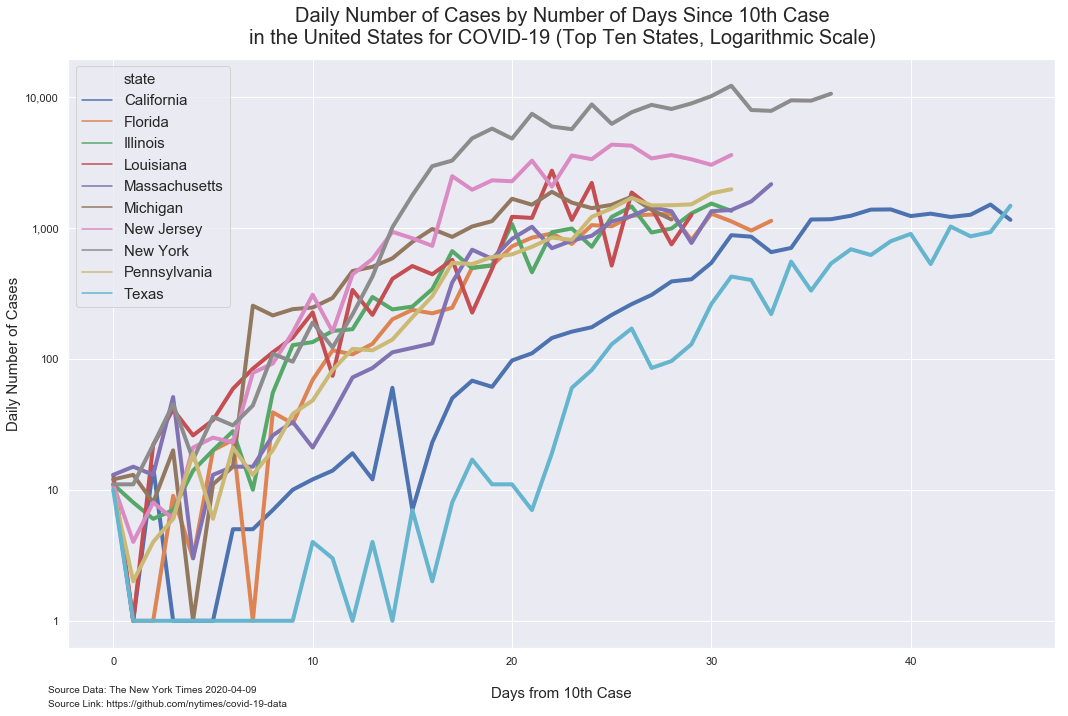

In [202]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
sns.lineplot(x="days_since_ten_case", y="daily_cases",
             hue="state",
             data=temp_fill_zeros, linewidth=4)

ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Daily Number of Cases', fontsize=15)
plt.title('Daily Number of Cases by Number of Days Since 10th Case\nin the United States for COVID-19 (Top Ten States, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state-top-10-daily-log')

In [203]:
state_ten_cases['daily_cases'].loc[state_ten_cases.daily_cases == 0]

108    0.0
110    0.0
235    0.0
236    0.0
237    0.0
239    0.0
240    0.0
241    0.0
242    0.0
246    0.0
293    0.0
Name: daily_cases, dtype: float64

# Daily Number of Cases Since 10th Case (Weekly Average)

In [204]:
state_ten_cases_weekly = state_ten_cases.sort_values(by=['state', 'date','cases'], 
                                                    ascending=[True, True, True])

In [205]:
state_ten_cases_weekly[0:30]

date       state  cases  daily_cases  deaths date_ten_case  \
107 2020-02-24  California     11         11.0       0    2020-02-24   
108 2020-02-25  California     11          0.0       0    2020-02-24   
109 2020-02-26  California     26         15.0       0    2020-02-24   
110 2020-02-27  California     26          0.0       0    2020-02-24   
111 2020-02-28  California     27          1.0       0    2020-02-24   
112 2020-02-29  California     28          1.0       0    2020-02-24   
113 2020-03-01  California     33          5.0       0    2020-02-24   
114 2020-03-02  California     38          5.0       0    2020-02-24   
115 2020-03-03  California     45          7.0       0    2020-02-24   
116 2020-03-04  California     55         10.0       1    2020-02-24   
117 2020-03-05  California     67         12.0       1    2020-02-24   
118 2020-03-06  California     81         14.0       1    2020-02-24   
119 2020-03-07  California    100         19.0       1    2020-02-24   
120 2020-03-08  California    112         12.0       1    2020-02-24   
121 2020-03-09  California    172         60.0       2    2020-02-24   
122 2020-03-10  California    179          7.0       3    2020-02-24   
123 2020-03-11  California    202         23.0       4    2020-02-24   
124 2020-03-12  California    252         50.0       4    2020-02-24   
125 2020-03-13  California    320         68.0       5    2020-02-24   
126 2020-03-14  California    381         61.0       5    2020-02-24   
127 2020-03-15  California    478         97.0       6    2020-02-24   
128 2020-03-16  California    588        110.0      11    2020-02-24   
129 2020-03-17  California    732        144.0      14    2020-02-24   
130 2020-03-18  California    893        161.0      17    2020-02-24   
131 2020-03-19  California   1067        174.0      19    2020-02-24   
132 2020-03-20  California   1283        216.0      24    2020-02-24   
133 2020-03-21  California   1544        261.0      28    2020-02-24   
134 2020-03-22  California   1851        307.0      35    2020-02-24   
135 2020-03-23  California   2240        389.0      39    2020-02-24   
136 2020-03-24  California   2644        404.0      52    2020-02-24   

     days_since_ten_case  
107                    0  
108                    1  
109                    2  
110                    3  
111                    4  
112                    5  
113                    6  
114                    7  
115                    8  
116                    9  
117                   10  
118                   11  
119                   12  
120                   13  
121                   14  
122                   15  
123                   16  
124                   17  
125                   18  
126                   19  
127                   20  
128                   21  
129                   22  
130                   23  
131                   24  
132                   25  
133                   26  
134                   27  
135                   28  
136                   29

In [206]:
state_ten_cases_weekly = state_ten_cases_weekly.set_index('date').groupby('state').resample('W').agg({'days_since_ten_case': 
                                                                    np.max, 'daily_cases': np.mean})

In [207]:
state_ten_cases_weekly

days_since_ten_case  daily_cases
state         date                                        
California    2020-03-01                    6     4.714286
              2020-03-08                   13    11.285714
              2020-03-15                   20    52.285714
              2020-03-22                   27   196.142857
              2020-03-29                   34   630.714286
              2020-04-05                   41  1258.571429
              2020-04-12                   45  1278.750000
Florida       2020-03-08                    1     6.500000
              2020-03-15                    8    13.714286
              2020-03-22                   15   127.285714
              2020-03-29                   22   563.142857
              2020-04-05                   29  1057.142857
              2020-04-12                   33  1119.250000
Illinois      2020-03-15                    6    13.428571
              2020-03-22                   13   136.142857
              2020-03-29                   20   509.428571
              2020-04-05                   27   951.857143
              2020-04-12                   31  1286.500000
Louisiana     2020-03-15                    4    20.600000
              2020-03-22                   11   104.857143
              2020-03-29                   18   386.142857
              2020-04-05                   25  1352.857143
              2020-04-12                   29  1318.250000
Massachusetts 2020-03-08                    1    14.000000
              2020-03-15                    8    19.428571
              2020-03-22                   15    68.857143
              2020-03-29                   22   615.571429
              2020-04-05                   29  1077.857143
              2020-04-12                   33  1610.250000
Michigan      2020-03-15                    3    13.250000
              2020-03-22                   10   140.000000
              2020-03-29                   17   636.142857
              2020-04-05                   24  1449.857143
              2020-04-12                   28  1435.000000
New Jersey    2020-03-15                    6    14.000000
              2020-03-22                   13   259.428571
              2020-03-29                   20  1638.857143
              2020-04-05                   27  3445.571429
              2020-04-12                   31  3380.500000
New York      2020-03-08                    4    21.200000
              2020-03-15                   11    89.428571
              2020-03-22                   18  2062.285714
              2020-03-29                   25  6342.857143
              2020-04-05                   32  9049.000000
              2020-04-12                   36  9256.500000
Pennsylvania  2020-03-15                    6     9.714286
              2020-03-22                   13    62.285714
              2020-03-29                   20   419.571429
              2020-04-05                   27  1164.000000
              2020-04-12                   31  1697.500000
Texas         2020-03-01                    6     1.571429
              2020-03-08                   13     1.714286
              2020-03-15                   20     8.142857
              2020-03-22                   27    78.857143
              2020-03-29                   34   297.142857
              2020-04-05                   41   626.000000
              2020-04-12                   45  1069.500000

In [208]:
state_ten_cases_weekly.reset_index(inplace=True)
state_ten_cases_weekly.rename(columns={'daily_cases': 'daily_cases_week_average'}, inplace=True)

In [209]:
state_ten_cases_weekly

state       date  days_since_ten_case  daily_cases_week_average
0      California 2020-03-01                    6                  4.714286
1      California 2020-03-08                   13                 11.285714
2      California 2020-03-15                   20                 52.285714
3      California 2020-03-22                   27                196.142857
4      California 2020-03-29                   34                630.714286
5      California 2020-04-05                   41               1258.571429
6      California 2020-04-12                   45               1278.750000
7         Florida 2020-03-08                    1                  6.500000
8         Florida 2020-03-15                    8                 13.714286
9         Florida 2020-03-22                   15                127.285714
10        Florida 2020-03-29                   22                563.142857
11        Florida 2020-04-05                   29               1057.142857
12        Florida 2020-04-12                   33               1119.250000
13       Illinois 2020-03-15                    6                 13.428571
14       Illinois 2020-03-22                   13                136.142857
15       Illinois 2020-03-29                   20                509.428571
16       Illinois 2020-04-05                   27                951.857143
17       Illinois 2020-04-12                   31               1286.500000
18      Louisiana 2020-03-15                    4                 20.600000
19      Louisiana 2020-03-22                   11                104.857143
20      Louisiana 2020-03-29                   18                386.142857
21      Louisiana 2020-04-05                   25               1352.857143
22      Louisiana 2020-04-12                   29               1318.250000
23  Massachusetts 2020-03-08                    1                 14.000000
24  Massachusetts 2020-03-15                    8                 19.428571
25  Massachusetts 2020-03-22                   15                 68.857143
26  Massachusetts 2020-03-29                   22                615.571429
27  Massachusetts 2020-04-05                   29               1077.857143
28  Massachusetts 2020-04-12                   33               1610.250000
29       Michigan 2020-03-15                    3                 13.250000
30       Michigan 2020-03-22                   10                140.000000
31       Michigan 2020-03-29                   17                636.142857
32       Michigan 2020-04-05                   24               1449.857143
33       Michigan 2020-04-12                   28               1435.000000
34     New Jersey 2020-03-15                    6                 14.000000
35     New Jersey 2020-03-22                   13                259.428571
36     New Jersey 2020-03-29                   20               1638.857143
37     New Jersey 2020-04-05                   27               3445.571429
38     New Jersey 2020-04-12                   31               3380.500000
39       New York 2020-03-08                    4                 21.200000
40       New York 2020-03-15                   11                 89.428571
41       New York 2020-03-22                   18               2062.285714
42       New York 2020-03-29                   25               6342.857143
43       New York 2020-04-05                   32               9049.000000
44       New York 2020-04-12                   36               9256.500000
45   Pennsylvania 2020-03-15                    6                  9.714286
46   Pennsylvania 2020-03-22                   13                 62.285714
47   Pennsylvania 2020-03-29                   20                419.571429
48   Pennsylvania 2020-04-05                   27               1164.000000
49   Pennsylvania 2020-04-12                   31               1697.500000
50          Texas 2020-03-01                    6                  1.571429
51          Texas 2020-03-08                   13           

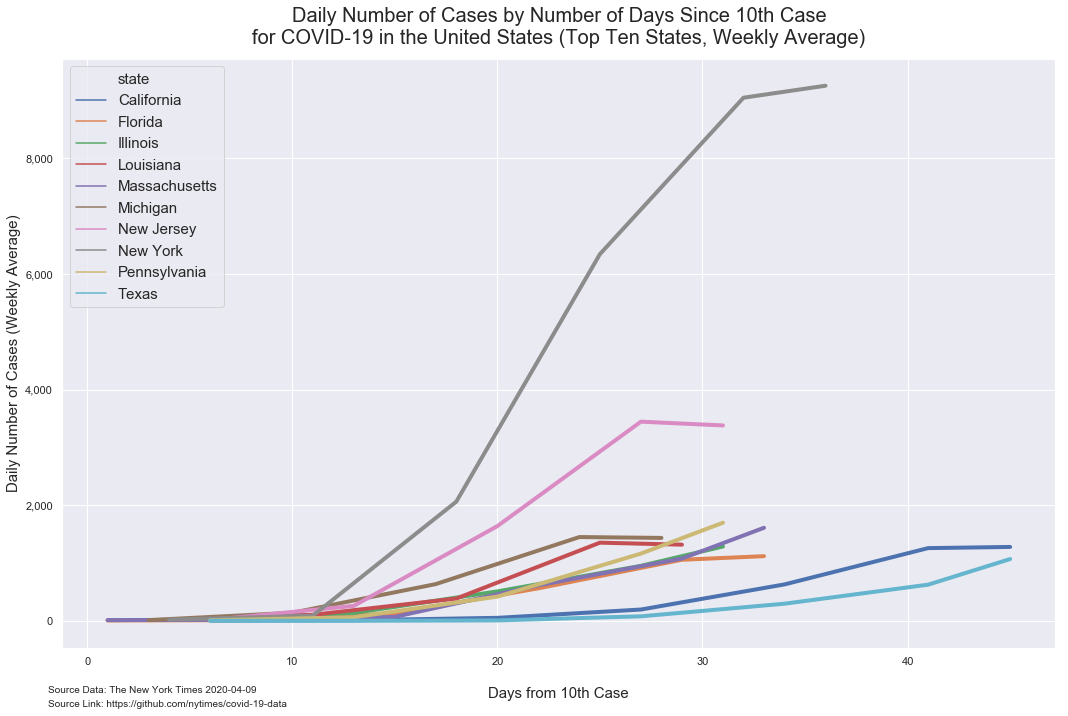

In [210]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
sns.lineplot(x="days_since_ten_case", y="daily_cases_week_average",
             hue="state",
             data=state_ten_cases_weekly, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Daily Number of Cases by Number of Days Since 10th Case\nfor COVID-19 in the United States (Top Ten States, Weekly Average)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state-top-10-weekly')

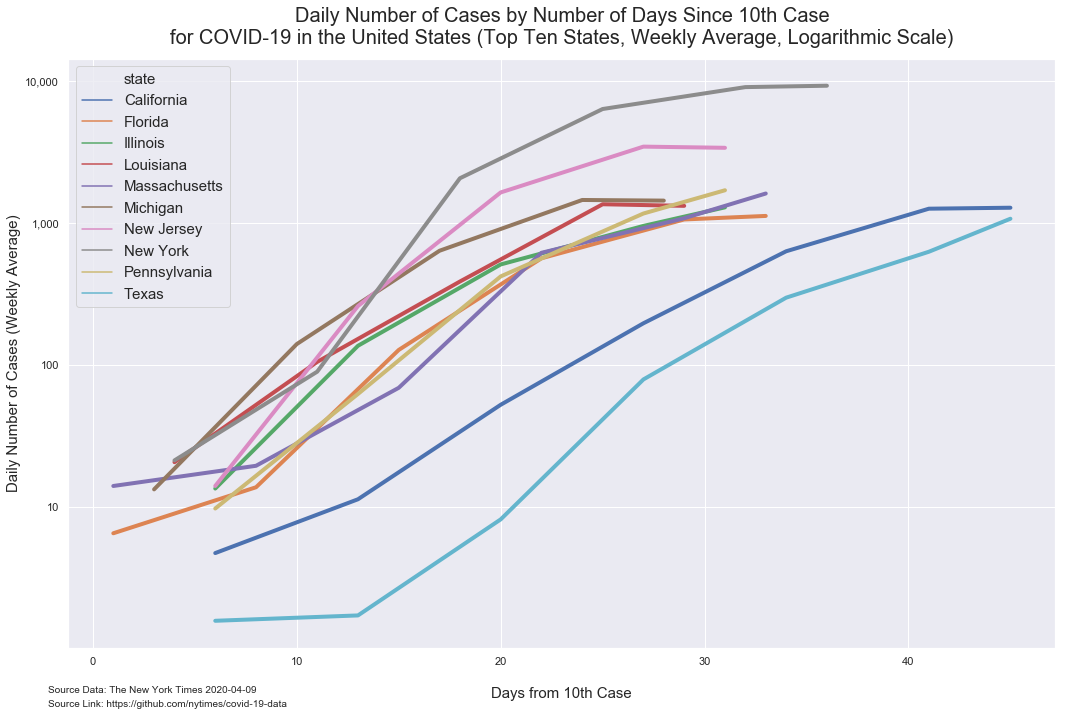

In [211]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_since_ten_case", y="daily_cases_week_average",
             hue="state",
             data=state_ten_cases_weekly, linewidth=4)

ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Daily Number of Cases by Number of Days Since 10th Case\nfor COVID-19 in the United States (Top Ten States, Weekly Average, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state-top-10-weekly-log')

# Calculating Growth Rate = Cases Today / Cases the Previous Day

In [212]:
growth_rate = state_ten_cases.sort_values(by=['state', 'date', 'cases'], 
                                                ascending=[True, True, True])

In [213]:
growth_rate.head()

date       state  cases  daily_cases  deaths date_ten_case  \
107 2020-02-24  California     11         11.0       0    2020-02-24   
108 2020-02-25  California     11          0.0       0    2020-02-24   
109 2020-02-26  California     26         15.0       0    2020-02-24   
110 2020-02-27  California     26          0.0       0    2020-02-24   
111 2020-02-28  California     27          1.0       0    2020-02-24   

     days_since_ten_case  
107                    0  
108                    1  
109                    2  
110                    3  
111                    4

In [214]:
growth_rate['growth_rate'] = (growth_rate['daily_cases'] / growth_rate['daily_cases'].shift(1))

In [215]:
growth_rate[:50]

date       state  cases  daily_cases  deaths date_ten_case  \
107 2020-02-24  California     11         11.0       0    2020-02-24   
108 2020-02-25  California     11          0.0       0    2020-02-24   
109 2020-02-26  California     26         15.0       0    2020-02-24   
110 2020-02-27  California     26          0.0       0    2020-02-24   
111 2020-02-28  California     27          1.0       0    2020-02-24   
112 2020-02-29  California     28          1.0       0    2020-02-24   
113 2020-03-01  California     33          5.0       0    2020-02-24   
114 2020-03-02  California     38          5.0       0    2020-02-24   
115 2020-03-03  California     45          7.0       0    2020-02-24   
116 2020-03-04  California     55         10.0       1    2020-02-24   
117 2020-03-05  California     67         12.0       1    2020-02-24   
118 2020-03-06  California     81         14.0       1    2020-02-24   
119 2020-03-07  California    100         19.0       1    2020-02-24   
120 2020-03-08  California    112         12.0       1    2020-02-24   
121 2020-03-09  California    172         60.0       2    2020-02-24   
122 2020-03-10  California    179          7.0       3    2020-02-24   
123 2020-03-11  California    202         23.0       4    2020-02-24   
124 2020-03-12  California    252         50.0       4    2020-02-24   
125 2020-03-13  California    320         68.0       5    2020-02-24   
126 2020-03-14  California    381         61.0       5    2020-02-24   
127 2020-03-15  California    478         97.0       6    2020-02-24   
128 2020-03-16  California    588        110.0      11    2020-02-24   
129 2020-03-17  California    732        144.0      14    2020-02-24   
130 2020-03-18  California    893        161.0      17    2020-02-24   
131 2020-03-19  California   1067        174.0      19    2020-02-24   
132 2020-03-20  California   1283        216.0      24    2020-02-24   
133 2020-03-21  California   1544        261.0      28    2020-02-24   
134 2020-03-22  California   1851        307.0      35    2020-02-24   
135 2020-03-23  California   2240        389.0      39    2020-02-24   
136 2020-03-24  California   2644        404.0      52    2020-02-24   
137 2020-03-25  California   3183        539.0      67    2020-02-24   
138 2020-03-26  California   4060        877.0      82    2020-02-24   
139 2020-03-27  California   4914        854.0     102    2020-02-24   
140 2020-03-28  California   5565        651.0     121    2020-02-24   
141 2020-03-29  California   6266        701.0     130    2020-02-24   
142 2020-03-30  California   7421       1155.0     146    2020-02-24   
143 2020-03-31  California   8582       1161.0     183    2020-02-24   
144 2020-04-01  California   9816       1234.0     212    2020-02-24   
145 2020-04-02  California  11190       1374.0     247    2020-02-24   
146 2020-04-03  California  12569       1379.0     282    2020-02-24   
147 2020-04-04  California  13796       1227.0     323    2020-02-24   
148 2020-04-05  California  15076       1280.0     349    2020-02-24   
149 2020-04-06  California  16284       1208.0     386    2020-02-24   
150 2020-04-07  California  17540       1256.0     447    2020-02-24   
151 2020-04-08  California  19043       1503.0     506    2020-02-24   
152 2020-04-09  California  20191       1148.0     548    2020-02-24   
286 2020-03-07     Florida     12         12.0       2    2020-03-07   
287 2020-03-08     Florida     13          1.0       2    2020-03-07   
288 2020-03-09     Florida     14          1.0       2    2020-03-07   
289 2020-03-10     Florida     23          9.0       2    2020-03-07   

     days_since_ten_case  growth_rate  
107                    0          NaN  
108                    1     0.000000  
109                    2          inf  
110                    3     0.000000  
111                    4          inf  
112                    5     1.000000  
113                    6     5.000000  
114              

In [216]:
replace = growth_rate['growth_rate'].loc[growth_rate.growth_rate < 0.02]
growth_rate['growth_rate'] = growth_rate['growth_rate'].replace(replace,  np.NaN)

inf = [np.inf, -np.inf]
growth_rate['growth_rate'] = growth_rate['growth_rate'].replace(inf, np.nan)

In [217]:
growth_rate[:50]

date       state  cases  daily_cases  deaths date_ten_case  \
107 2020-02-24  California     11         11.0       0    2020-02-24   
108 2020-02-25  California     11          0.0       0    2020-02-24   
109 2020-02-26  California     26         15.0       0    2020-02-24   
110 2020-02-27  California     26          0.0       0    2020-02-24   
111 2020-02-28  California     27          1.0       0    2020-02-24   
112 2020-02-29  California     28          1.0       0    2020-02-24   
113 2020-03-01  California     33          5.0       0    2020-02-24   
114 2020-03-02  California     38          5.0       0    2020-02-24   
115 2020-03-03  California     45          7.0       0    2020-02-24   
116 2020-03-04  California     55         10.0       1    2020-02-24   
117 2020-03-05  California     67         12.0       1    2020-02-24   
118 2020-03-06  California     81         14.0       1    2020-02-24   
119 2020-03-07  California    100         19.0       1    2020-02-24   
120 2020-03-08  California    112         12.0       1    2020-02-24   
121 2020-03-09  California    172         60.0       2    2020-02-24   
122 2020-03-10  California    179          7.0       3    2020-02-24   
123 2020-03-11  California    202         23.0       4    2020-02-24   
124 2020-03-12  California    252         50.0       4    2020-02-24   
125 2020-03-13  California    320         68.0       5    2020-02-24   
126 2020-03-14  California    381         61.0       5    2020-02-24   
127 2020-03-15  California    478         97.0       6    2020-02-24   
128 2020-03-16  California    588        110.0      11    2020-02-24   
129 2020-03-17  California    732        144.0      14    2020-02-24   
130 2020-03-18  California    893        161.0      17    2020-02-24   
131 2020-03-19  California   1067        174.0      19    2020-02-24   
132 2020-03-20  California   1283        216.0      24    2020-02-24   
133 2020-03-21  California   1544        261.0      28    2020-02-24   
134 2020-03-22  California   1851        307.0      35    2020-02-24   
135 2020-03-23  California   2240        389.0      39    2020-02-24   
136 2020-03-24  California   2644        404.0      52    2020-02-24   
137 2020-03-25  California   3183        539.0      67    2020-02-24   
138 2020-03-26  California   4060        877.0      82    2020-02-24   
139 2020-03-27  California   4914        854.0     102    2020-02-24   
140 2020-03-28  California   5565        651.0     121    2020-02-24   
141 2020-03-29  California   6266        701.0     130    2020-02-24   
142 2020-03-30  California   7421       1155.0     146    2020-02-24   
143 2020-03-31  California   8582       1161.0     183    2020-02-24   
144 2020-04-01  California   9816       1234.0     212    2020-02-24   
145 2020-04-02  California  11190       1374.0     247    2020-02-24   
146 2020-04-03  California  12569       1379.0     282    2020-02-24   
147 2020-04-04  California  13796       1227.0     323    2020-02-24   
148 2020-04-05  California  15076       1280.0     349    2020-02-24   
149 2020-04-06  California  16284       1208.0     386    2020-02-24   
150 2020-04-07  California  17540       1256.0     447    2020-02-24   
151 2020-04-08  California  19043       1503.0     506    2020-02-24   
152 2020-04-09  California  20191       1148.0     548    2020-02-24   
286 2020-03-07     Florida     12         12.0       2    2020-03-07   
287 2020-03-08     Florida     13          1.0       2    2020-03-07   
288 2020-03-09     Florida     14          1.0       2    2020-03-07   
289 2020-03-10     Florida     23          9.0       2    2020-03-07   

     days_since_ten_case  growth_rate  
107                    0          NaN  
108                    1          NaN  
109                    2          NaN  
110                    3          NaN  
111                    4          NaN  
112                    5     1.000000  
113                    6     5.000000  
114              

In [218]:
growth_rate = growth_rate.dropna(subset=['growth_rate'])

In [219]:
growth_rate.isna().sum()

date                   0
state                  0
cases                  0
daily_cases            0
deaths                 0
date_ten_case          0
days_since_ten_case    0
growth_rate            0
dtype: int64

In [220]:
growth_rate

date       state  cases  daily_cases  deaths date_ten_case  \
112 2020-02-29  California     28          1.0       0    2020-02-24   
113 2020-03-01  California     33          5.0       0    2020-02-24   
114 2020-03-02  California     38          5.0       0    2020-02-24   
115 2020-03-03  California     45          7.0       0    2020-02-24   
116 2020-03-04  California     55         10.0       1    2020-02-24   
..         ...         ...    ...          ...     ...           ...   
275 2020-04-05       Texas   7094        528.0     137    2020-02-24   
276 2020-04-06       Texas   8115       1021.0     160    2020-02-24   
277 2020-04-07       Texas   8974        859.0     178    2020-02-24   
278 2020-04-08       Texas   9900        926.0     195    2020-02-24   
279 2020-04-09       Texas  11372       1472.0     228    2020-02-24   

     days_since_ten_case  growth_rate  
112                    5     1.000000  
113                    6     5.000000  
114                    7     1.000000  
115                    8     1.400000  
116                    9     1.428571  
..                   ...          ...  
275                   41     0.588629  
276                   42     1.933712  
277                   43     0.841332  
278                   44     1.077998  
279                   45     1.589633  

[325 rows x 8 columns]

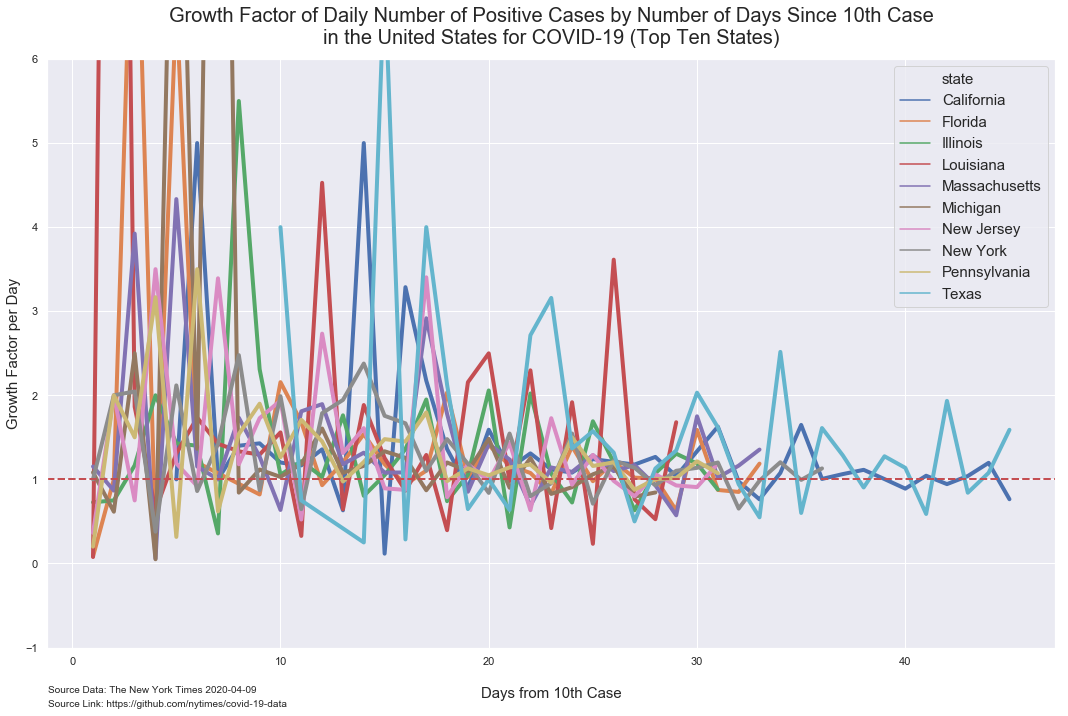

In [221]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_since_ten_case", y="growth_rate",
             hue="state", data=growth_rate , linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')

ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.ylim(-1, 6)

ax1.legend(loc='upper right', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Growth Factor per Day', fontsize=15)
plt.title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nin the United States for COVID-19 (Top Ten States)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/growth-factor-top-10-daily')

# Weekly Growth Rate

In [222]:
growth_rate_weekly = growth_rate.set_index('date').groupby('state').resample('W').agg({'days_since_ten_case': 
                                                                    np.max, 'growth_rate': np.mean})

In [223]:
growth_rate_weekly

days_since_ten_case  growth_rate
state         date                                        
California    2020-03-01                    6     3.000000
              2020-03-08                   13     1.169137
              2020-03-15                   20     2.060502
              2020-03-22                   27     1.181124
              2020-03-29                   34     1.154254
              2020-04-05                   41     1.109397
              2020-04-12                   45     0.985987
Florida       2020-03-08                    1     0.083333
              2020-03-15                    6     3.640000
              2020-03-22                   15     1.358732
              2020-03-29                   22     1.250641
              2020-04-05                   29     1.010336
              2020-04-12                   33     1.125184
Illinois      2020-03-15                    6     1.245418
              2020-03-22                   13     1.890050
              2020-03-29                   20     1.288279
              2020-04-05                   27     1.109722
              2020-04-12                   31     1.111305
Louisiana     2020-03-15                    4     6.143676
              2020-03-22                   11     1.282964
              2020-03-29                   18     1.551360
              2020-04-05                   25     1.500303
              2020-04-12                   29     1.645497
Massachusetts 2020-03-08                    1     1.153846
              2020-03-15                    8     1.867011
              2020-03-22                   15     1.312631
              2020-03-29                   22     1.424623
              2020-04-05                   29     1.041199
              2020-04-12                   33     1.322212
Michigan      2020-03-15                    3     1.399573
              2020-03-22                   10     4.619372
              2020-03-29                   17     1.212195
              2020-04-05                   24     1.095772
              2020-04-12                   28     0.962712
New Jersey    2020-03-15                    6     1.454019
              2020-03-22                   13     1.829349
              2020-03-29                   20     1.390243
              2020-04-05                   27     1.115434
              2020-04-12                   31     1.021185
New York      2020-03-08                    4     1.355808
              2020-03-15                   11     1.483132
              2020-03-22                   18     1.730523
              2020-03-29                   25     1.082940
              2020-04-05                   32     1.055362
              2020-04-12                   36     1.078072
Pennsylvania  2020-03-15                    6     1.780409
              2020-03-22                   13     1.350716
              2020-03-29                   20     1.298609
              2020-04-05                   27     1.145220
              2020-04-12                   31     1.076580
Texas         2020-03-08                   11     2.375000
              2020-03-15                   20     2.186825
              2020-03-22                   27     1.609459
              2020-03-29                   34     1.446912
              2020-04-05                   41     1.057139
              2020-04-12                   45     1.360669

In [224]:
growth_rate_weekly.reset_index(inplace=True)
growth_rate_weekly.rename(columns={'growth_rate': 'growth_rate_weekly_average'}, inplace=True)

In [225]:
growth_rate_weekly

state       date  days_since_ten_case  growth_rate_weekly_average
0      California 2020-03-01                    6                    3.000000
1      California 2020-03-08                   13                    1.169137
2      California 2020-03-15                   20                    2.060502
3      California 2020-03-22                   27                    1.181124
4      California 2020-03-29                   34                    1.154254
5      California 2020-04-05                   41                    1.109397
6      California 2020-04-12                   45                    0.985987
7         Florida 2020-03-08                    1                    0.083333
8         Florida 2020-03-15                    6                    3.640000
9         Florida 2020-03-22                   15                    1.358732
10        Florida 2020-03-29                   22                    1.250641
11        Florida 2020-04-05                   29                    1.010336
12        Florida 2020-04-12                   33                    1.125184
13       Illinois 2020-03-15                    6                    1.245418
14       Illinois 2020-03-22                   13                    1.890050
15       Illinois 2020-03-29                   20                    1.288279
16       Illinois 2020-04-05                   27                    1.109722
17       Illinois 2020-04-12                   31                    1.111305
18      Louisiana 2020-03-15                    4                    6.143676
19      Louisiana 2020-03-22                   11                    1.282964
20      Louisiana 2020-03-29                   18                    1.551360
21      Louisiana 2020-04-05                   25                    1.500303
22      Louisiana 2020-04-12                   29                    1.645497
23  Massachusetts 2020-03-08                    1                    1.153846
24  Massachusetts 2020-03-15                    8                    1.867011
25  Massachusetts 2020-03-22                   15                    1.312631
26  Massachusetts 2020-03-29                   22                    1.424623
27  Massachusetts 2020-04-05                   29                    1.041199
28  Massachusetts 2020-04-12                   33                    1.322212
29       Michigan 2020-03-15                    3                    1.399573
30       Michigan 2020-03-22                   10                    4.619372
31       Michigan 2020-03-29                   17                    1.212195
32       Michigan 2020-04-05                   24                    1.095772
33       Michigan 2020-04-12                   28                    0.962712
34     New Jersey 2020-03-15                    6                    1.454019
35     New Jersey 2020-03-22                   13                    1.829349
36     New Jersey 2020-03-29                   20                    1.390243
37     New Jersey 2020-04-05                   27                    1.115434
38     New Jersey 2020-04-12                   31                    1.021185
39       New York 2020-03-08                    4                    1.355808
40       New York 2020-03-15                   11                    1.483132
41       New York 2020-03-22                   18                    1.730523
42       New York 2020-03-29                   25                    1.082940
43       New York 2020-04-05                   32                    1.055362
44       New York 2020-04-12                   36                    1.078072
45   Pennsylvania 2020-03-15                    6                    1.780409
46   Pennsylvania 2020-03-22                   13                    1.350716
47   Pennsylvania 2020-03-29                   20                    1.298609
48   Pennsylvania 2020-04-05                   27                    1.145220
49   Pennsylvania 2020-04-12                   31                    1.076580
50          Texas 2020-03-08      

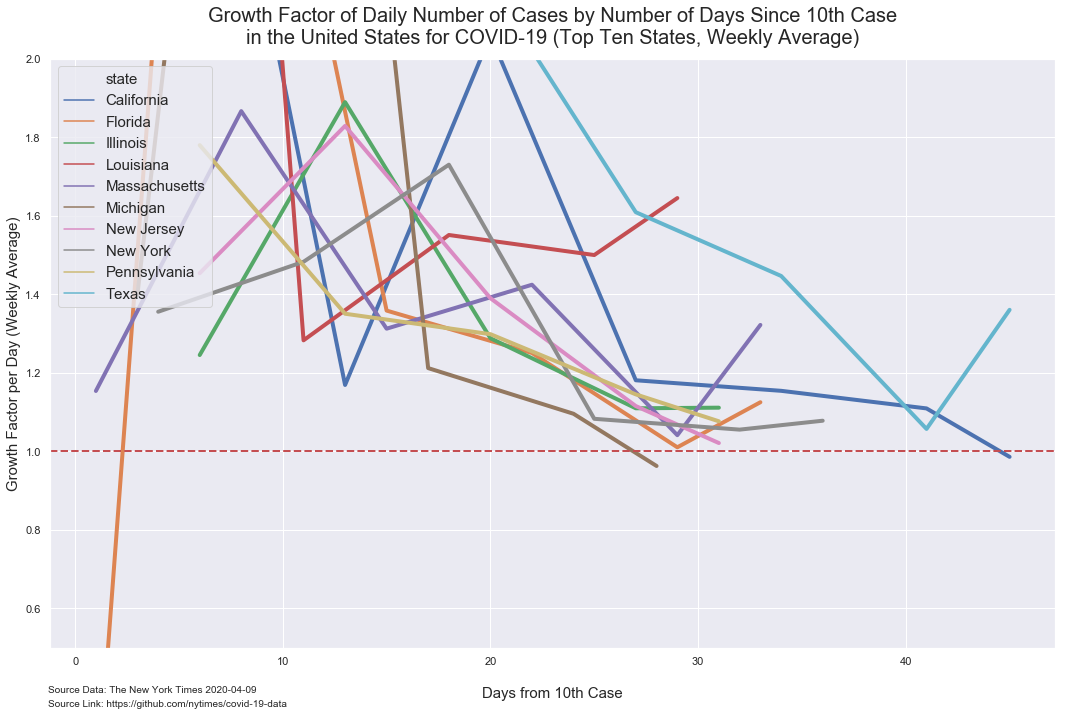

In [226]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_since_ten_case", y="growth_rate_weekly_average",
             hue="state", data=growth_rate_weekly, linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')

ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.ylim(0.5, 2)

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Growth Factor per Day (Weekly Average)', fontsize=15)
plt.title('Growth Factor of Daily Number of Cases by Number of Days Since 10th Case\nin the United States for COVID-19 (Top Ten States, Weekly Average)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/growth-factor-top-10-weekly')

# Cumulative Number of Cases

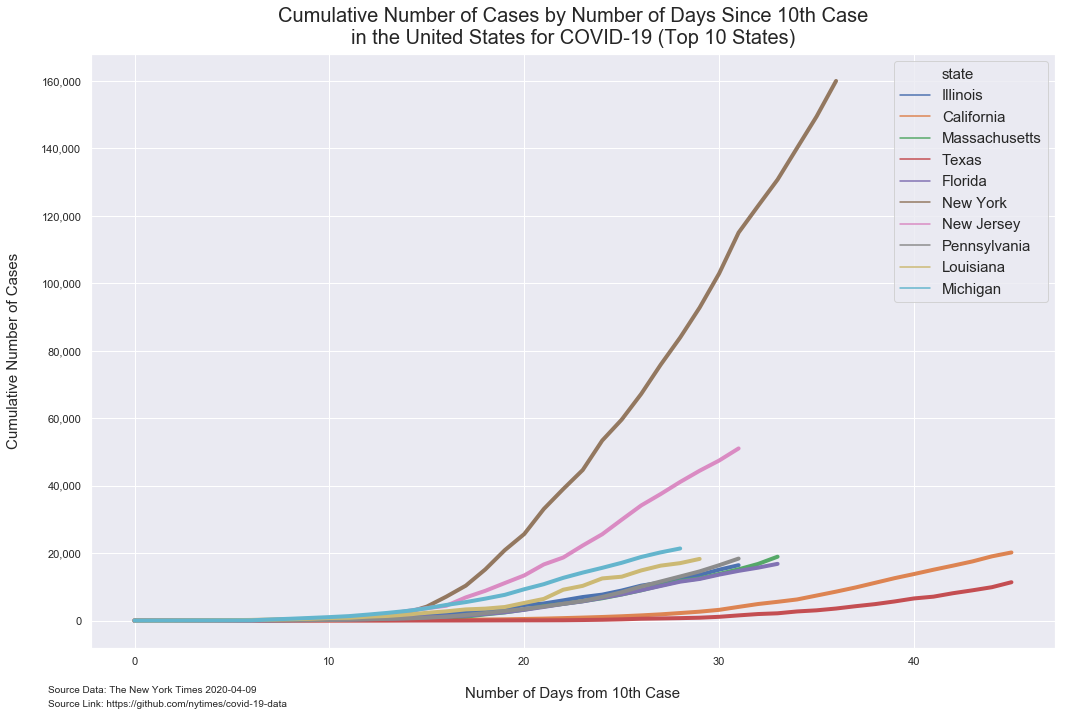

In [227]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_since_ten_case", y="cases",
             hue="state",
             data=state_ten_cases, linewidth=4)

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.grid(True)
ax1.grid(axis='x', which='minor')
ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('Number of Days from 10th Case', fontsize=15)
ax1.set_ylabel('Cumulative Number of Cases', fontsize=15)
plt.title('Cumulative Number of Cases by Number of Days Since 10th Case\nin the United States for COVID-19 (Top 10 States)', 
          pad = 10, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-tenth-case')

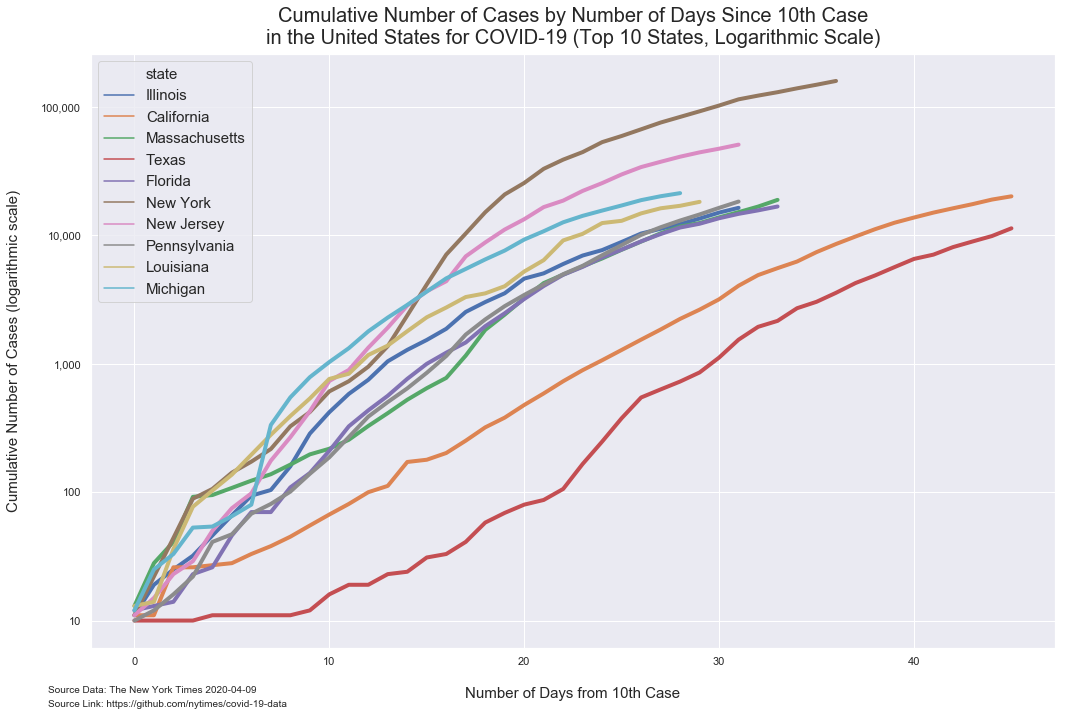

In [228]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_since_ten_case", y="cases",
             hue="state",
             data=state_ten_cases, linewidth=4)
    
ax1.set_yscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.grid(True)
ax1.grid(axis='x', which='minor')
ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('Number of Days from 10th Case', fontsize=15)
ax1.set_ylabel('Cumulative Number of Cases (logarithmic scale)', fontsize=15)
plt.title('Cumulative Number of Cases by Number of Days Since 10th Case\nin the United States for COVID-19 (Top 10 States, Logarithmic Scale)', 
          pad = 10, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-tenth-case-log')

# Cumulative Cases for All States

In [229]:
ten_cases_all_states = covid_19_state_data.loc[covid_19_state_data['cases'] >= 10]

In [230]:
ten_cases_all_states = ten_cases_all_states.sort_values(by=['date', 'cases'], 
                                ascending=[True, True], ).drop_duplicates(subset ="state", keep = 'first').reset_index(drop=True)

In [231]:
ten_cases_all_states = ten_cases_all_states[['state', 'date']]
ten_cases_all_states.rename(columns={'date': 'ten_cases_date'}, inplace=True)

In [232]:
ten_cases_all_states

state ten_cases_date
0                   Nebraska     2020-02-17
1                      Texas     2020-02-24
2                 California     2020-02-24
3                 Washington     2020-02-29
4                   New York     2020-03-04
5                    Florida     2020-03-07
6              Massachusetts     2020-03-07
7                    Georgia     2020-03-08
8                     Oregon     2020-03-08
9               Pennsylvania     2020-03-09
10                  Illinois     2020-03-09
11                New Jersey     2020-03-09
12                  Colorado     2020-03-09
13                      Iowa     2020-03-10
14      District of Columbia     2020-03-11
15            South Carolina     2020-03-11
16                  Virginia     2020-03-11
17                   Indiana     2020-03-11
18                 Louisiana     2020-03-11
19                  Maryland     2020-03-11
20                  Kentucky     2020-03-12
21                    Nevada     2020-03-12
22                  Michigan     2020-03-12
23            North Carolina     2020-03-12
24                 Tennessee     2020-03-12
25                New Mexico     2020-03-13
26               Connecticut     2020-03-13
27                      Ohio     2020-03-13
28                 Minnesota     2020-03-13
29                 Wisconsin     2020-03-13
30              Rhode Island     2020-03-13
31                   Alabama     2020-03-14
32                   Arizona     2020-03-14
33                      Utah     2020-03-14
34               Mississippi     2020-03-15
35                     Maine     2020-03-15
36             New Hampshire     2020-03-15
37                  Arkansas     2020-03-15
38                    Hawaii     2020-03-16
39                  Oklahoma     2020-03-16
40              South Dakota     2020-03-16
41                   Wyoming     2020-03-16
42                    Kansas     2020-03-16
43                   Vermont     2020-03-16
44                  Delaware     2020-03-17
45                  Missouri     2020-03-17
46                     Idaho     2020-03-18
47                   Montana     2020-03-18
48                    Alaska     2020-03-19
49                      Guam     2020-03-19
50              North Dakota     2020-03-19
51               Puerto Rico     2020-03-20
52             West Virginia     2020-03-21
53            Virgin Islands     2020-03-22
54  Northern Mariana Islands     2020-04-08

In [233]:
ten_cases_all_states = covid_19_state_data.merge(ten_cases_all_states, left_on='state', right_on='state')

In [234]:
ten_cases_all_states = ten_cases_all_states.loc[ten_cases_all_states['cases'] >= 10]

In [235]:
ten_cases_all_states

date                     state  fips  cases  deaths ten_cases_date
39   2020-02-29                Washington    53     10       1     2020-02-29
40   2020-03-01                Washington    53     17       3     2020-02-29
41   2020-03-02                Washington    53     23       6     2020-02-29
42   2020-03-03                Washington    53     32      10     2020-02-29
43   2020-03-04                Washington    53     47      11     2020-02-29
...         ...                       ...   ...    ...     ...            ...
2088 2020-04-07             West Virginia    54    412       4     2020-03-21
2089 2020-04-08             West Virginia    54    483       4     2020-03-21
2090 2020-04-09             West Virginia    54    524       5     2020-03-21
2102 2020-04-08  Northern Mariana Islands    69     11       2     2020-04-08
2103 2020-04-09  Northern Mariana Islands    69     11       2     2020-04-08

[1566 rows x 6 columns]

In [236]:
ten_cases_all_states['days_from_10_cases'] = (ten_cases_all_states['date'] - 
                                              ten_cases_all_states['ten_cases_date']).dt.days

In [237]:
ten_cases_all_states

date                     state  fips  cases  deaths ten_cases_date  \
39   2020-02-29                Washington    53     10       1     2020-02-29   
40   2020-03-01                Washington    53     17       3     2020-02-29   
41   2020-03-02                Washington    53     23       6     2020-02-29   
42   2020-03-03                Washington    53     32      10     2020-02-29   
43   2020-03-04                Washington    53     47      11     2020-02-29   
...         ...                       ...   ...    ...     ...            ...   
2088 2020-04-07             West Virginia    54    412       4     2020-03-21   
2089 2020-04-08             West Virginia    54    483       4     2020-03-21   
2090 2020-04-09             West Virginia    54    524       5     2020-03-21   
2102 2020-04-08  Northern Mariana Islands    69     11       2     2020-04-08   
2103 2020-04-09  Northern Mariana Islands    69     11       2     2020-04-08   

      days_from_10_cases  
39                     0  
40                     1  
41                     2  
42                     3  
43                     4  
...                  ...  
2088                  17  
2089                  18  
2090                  19  
2102                   0  
2103                   1  

[1566 rows x 7 columns]

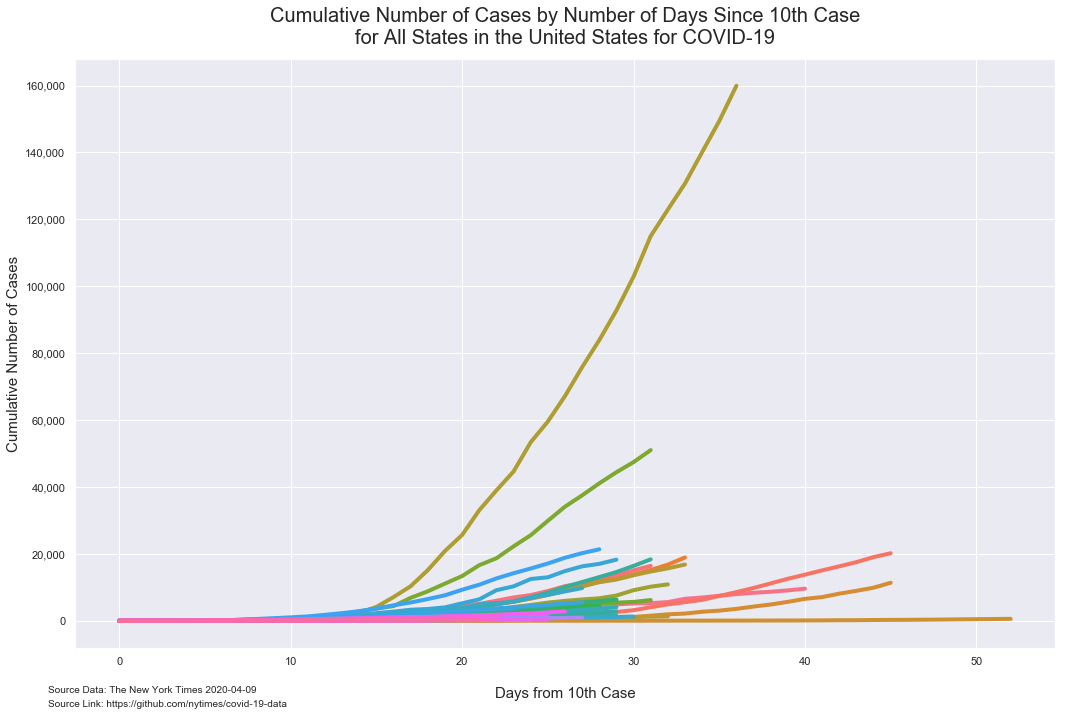

In [238]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_from_10_cases", y="cases",
             hue="state",
             data=ten_cases_all_states, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Cumulative Number of Cases', fontsize=15)
plt.title('Cumulative Number of Cases by Number of Days Since 10th Case\nfor All States in the United States for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state')

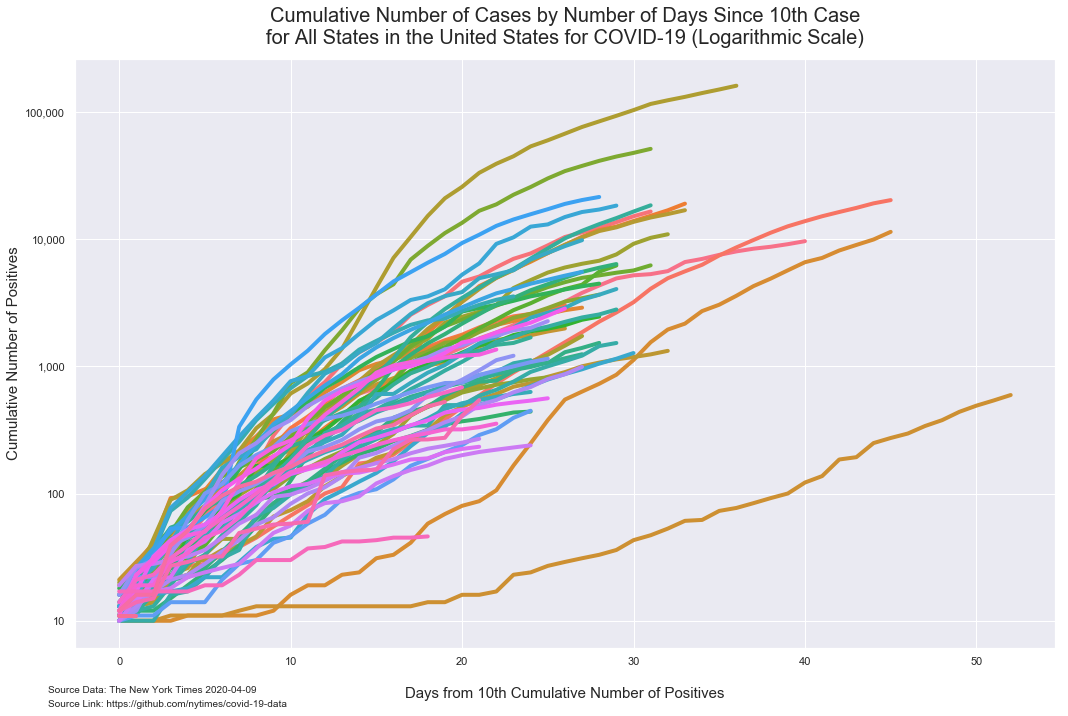

In [239]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_from_10_cases", y="cases",
             hue="state",
             data=ten_cases_all_states, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Cases by Number of Days Since 10th Case\nfor All States in the United States for COVID-19 (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state-log')

# Trajectory Plots = daily number (log) vs. total number (log) 

## Daily

In [240]:
trajectory_plot = state_ten_cases.sort_values(by=['state', 'date','cases'], 
                                ascending=[True, True, True])

In [241]:
trajectory_plot[:50]

date       state  cases  daily_cases  deaths date_ten_case  \
107 2020-02-24  California     11         11.0       0    2020-02-24   
108 2020-02-25  California     11          0.0       0    2020-02-24   
109 2020-02-26  California     26         15.0       0    2020-02-24   
110 2020-02-27  California     26          0.0       0    2020-02-24   
111 2020-02-28  California     27          1.0       0    2020-02-24   
112 2020-02-29  California     28          1.0       0    2020-02-24   
113 2020-03-01  California     33          5.0       0    2020-02-24   
114 2020-03-02  California     38          5.0       0    2020-02-24   
115 2020-03-03  California     45          7.0       0    2020-02-24   
116 2020-03-04  California     55         10.0       1    2020-02-24   
117 2020-03-05  California     67         12.0       1    2020-02-24   
118 2020-03-06  California     81         14.0       1    2020-02-24   
119 2020-03-07  California    100         19.0       1    2020-02-24   
120 2020-03-08  California    112         12.0       1    2020-02-24   
121 2020-03-09  California    172         60.0       2    2020-02-24   
122 2020-03-10  California    179          7.0       3    2020-02-24   
123 2020-03-11  California    202         23.0       4    2020-02-24   
124 2020-03-12  California    252         50.0       4    2020-02-24   
125 2020-03-13  California    320         68.0       5    2020-02-24   
126 2020-03-14  California    381         61.0       5    2020-02-24   
127 2020-03-15  California    478         97.0       6    2020-02-24   
128 2020-03-16  California    588        110.0      11    2020-02-24   
129 2020-03-17  California    732        144.0      14    2020-02-24   
130 2020-03-18  California    893        161.0      17    2020-02-24   
131 2020-03-19  California   1067        174.0      19    2020-02-24   
132 2020-03-20  California   1283        216.0      24    2020-02-24   
133 2020-03-21  California   1544        261.0      28    2020-02-24   
134 2020-03-22  California   1851        307.0      35    2020-02-24   
135 2020-03-23  California   2240        389.0      39    2020-02-24   
136 2020-03-24  California   2644        404.0      52    2020-02-24   
137 2020-03-25  California   3183        539.0      67    2020-02-24   
138 2020-03-26  California   4060        877.0      82    2020-02-24   
139 2020-03-27  California   4914        854.0     102    2020-02-24   
140 2020-03-28  California   5565        651.0     121    2020-02-24   
141 2020-03-29  California   6266        701.0     130    2020-02-24   
142 2020-03-30  California   7421       1155.0     146    2020-02-24   
143 2020-03-31  California   8582       1161.0     183    2020-02-24   
144 2020-04-01  California   9816       1234.0     212    2020-02-24   
145 2020-04-02  California  11190       1374.0     247    2020-02-24   
146 2020-04-03  California  12569       1379.0     282    2020-02-24   
147 2020-04-04  California  13796       1227.0     323    2020-02-24   
148 2020-04-05  California  15076       1280.0     349    2020-02-24   
149 2020-04-06  California  16284       1208.0     386    2020-02-24   
150 2020-04-07  California  17540       1256.0     447    2020-02-24   
151 2020-04-08  California  19043       1503.0     506    2020-02-24   
152 2020-04-09  California  20191       1148.0     548    2020-02-24   
286 2020-03-07     Florida     12         12.0       2    2020-03-07   
287 2020-03-08     Florida     13          1.0       2    2020-03-07   
288 2020-03-09     Florida     14          1.0       2    2020-03-07   
289 2020-03-10     Florida     23          9.0       2    2020-03-07   

     days_since_ten_case  
107                    0  
108                    1  
109                    2  
110                    3  
111                    4  
112                    5  
113                    6  
114                    7  
115                    8  
116                    9  
117                   10  
118          

/Users/geribauer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


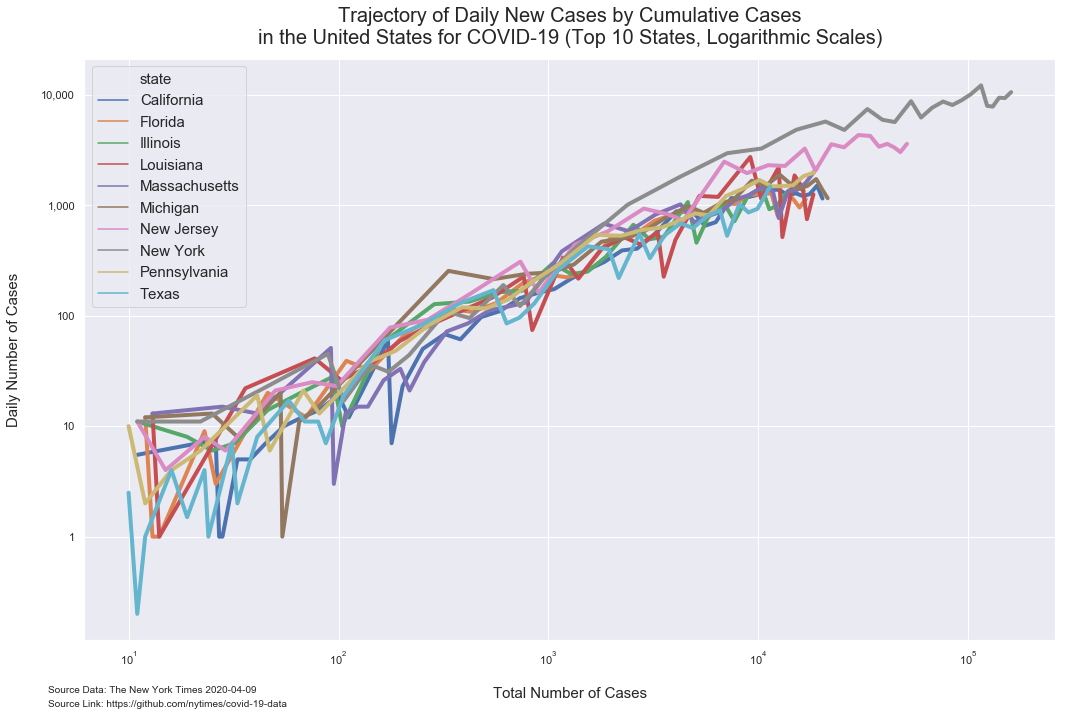

In [242]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="daily_cases",
             hue="state",
             data=trajectory_plot, linewidth=4, ci=False)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('Total Number of Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Cases', fontsize=15)
plt.title('Trajectory of Daily New Cases by Cumulative Cases\nin the United States for COVID-19 (Top 10 States, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-trajectory-daily-plot')

## Weekly

In [243]:
trajectory_plot_weekly = trajectory_plot[['state', 'date', 'cases', 'daily_cases']]

In [244]:
trajectory_plot_weekly.head()

state       date  cases  daily_cases
107  California 2020-02-24     11         11.0
108  California 2020-02-25     11          0.0
109  California 2020-02-26     26         15.0
110  California 2020-02-27     26          0.0
111  California 2020-02-28     27          1.0

In [245]:
trajectory_plot_weekly = trajectory_plot.set_index('date').groupby('state').resample('W').agg({'cases': np.max, 
                                                                                               'daily_cases': np.mean})

In [246]:
trajectory_plot_weekly

cases  daily_cases
state         date                           
California    2020-03-01      33     4.714286
              2020-03-08     112    11.285714
              2020-03-15     478    52.285714
              2020-03-22    1851   196.142857
              2020-03-29    6266   630.714286
              2020-04-05   15076  1258.571429
              2020-04-12   20191  1278.750000
Florida       2020-03-08      13     6.500000
              2020-03-15     109    13.714286
              2020-03-22    1000   127.285714
              2020-03-29    4942   563.142857
              2020-04-05   12342  1057.142857
              2020-04-12   16819  1119.250000
Illinois      2020-03-15      94    13.428571
              2020-03-22    1047   136.142857
              2020-03-29    4613   509.428571
              2020-04-05   11276   951.857143
              2020-04-12   16422  1286.500000
Louisiana     2020-03-15     103    20.600000
              2020-03-22     837   104.857143
              2020-03-29    3540   386.142857
              2020-04-05   13010  1352.857143
              2020-04-12   18283  1318.250000
Massachusetts 2020-03-08      28    14.000000
              2020-03-15     164    19.428571
              2020-03-22     646    68.857143
              2020-03-29    4955   615.571429
              2020-04-05   12500  1077.857143
              2020-04-12   18941  1610.250000
Michigan      2020-03-15      53    13.250000
              2020-03-22    1033   140.000000
              2020-03-29    5486   636.142857
              2020-04-05   15635  1449.857143
              2020-04-12   21375  1435.000000
New Jersey    2020-03-15      98    14.000000
              2020-03-22    1914   259.428571
              2020-03-29   13386  1638.857143
              2020-04-05   37505  3445.571429
              2020-04-12   51027  3380.500000
New York      2020-03-08     106    21.200000
              2020-03-15     732    89.428571
              2020-03-22   15168  2062.285714
              2020-03-29   59568  6342.857143
              2020-04-05  122911  9049.000000
              2020-04-12  159937  9256.500000
Pennsylvania  2020-03-15      68     9.714286
              2020-03-22     504    62.285714
              2020-03-29    3441   419.571429
              2020-04-05   11589  1164.000000
              2020-04-12   18379  1697.500000
Texas         2020-03-01      11     1.571429
              2020-03-08      23     1.714286
              2020-03-15      80     8.142857
              2020-03-22     632    78.857143
              2020-03-29    2712   297.142857
              2020-04-05    7094   626.000000
              2020-04-12   11372  1069.500000

In [247]:
trajectory_plot_weekly.reset_index(inplace=True)

In [248]:
trajectory_plot_weekly.rename(columns={'daily_cases': 'daily_cases_weekly_average'}, inplace=True)

In [249]:
trajectory_plot_weekly

state       date   cases  daily_cases_weekly_average
0      California 2020-03-01      33                    4.714286
1      California 2020-03-08     112                   11.285714
2      California 2020-03-15     478                   52.285714
3      California 2020-03-22    1851                  196.142857
4      California 2020-03-29    6266                  630.714286
5      California 2020-04-05   15076                 1258.571429
6      California 2020-04-12   20191                 1278.750000
7         Florida 2020-03-08      13                    6.500000
8         Florida 2020-03-15     109                   13.714286
9         Florida 2020-03-22    1000                  127.285714
10        Florida 2020-03-29    4942                  563.142857
11        Florida 2020-04-05   12342                 1057.142857
12        Florida 2020-04-12   16819                 1119.250000
13       Illinois 2020-03-15      94                   13.428571
14       Illinois 2020-03-22    1047                  136.142857
15       Illinois 2020-03-29    4613                  509.428571
16       Illinois 2020-04-05   11276                  951.857143
17       Illinois 2020-04-12   16422                 1286.500000
18      Louisiana 2020-03-15     103                   20.600000
19      Louisiana 2020-03-22     837                  104.857143
20      Louisiana 2020-03-29    3540                  386.142857
21      Louisiana 2020-04-05   13010                 1352.857143
22      Louisiana 2020-04-12   18283                 1318.250000
23  Massachusetts 2020-03-08      28                   14.000000
24  Massachusetts 2020-03-15     164                   19.428571
25  Massachusetts 2020-03-22     646                   68.857143
26  Massachusetts 2020-03-29    4955                  615.571429
27  Massachusetts 2020-04-05   12500                 1077.857143
28  Massachusetts 2020-04-12   18941                 1610.250000
29       Michigan 2020-03-15      53                   13.250000
30       Michigan 2020-03-22    1033                  140.000000
31       Michigan 2020-03-29    5486                  636.142857
32       Michigan 2020-04-05   15635                 1449.857143
33       Michigan 2020-04-12   21375                 1435.000000
34     New Jersey 2020-03-15      98                   14.000000
35     New Jersey 2020-03-22    1914                  259.428571
36     New Jersey 2020-03-29   13386                 1638.857143
37     New Jersey 2020-04-05   37505                 3445.571429
38     New Jersey 2020-04-12   51027                 3380.500000
39       New York 2020-03-08     106                   21.200000
40       New York 2020-03-15     732                   89.428571
41       New York 2020-03-22   15168                 2062.285714
42       New York 2020-03-29   59568                 6342.857143
43       New York 2020-04-05  122911                 9049.000000
44       New York 2020-04-12  159937                 9256.500000
45   Pennsylvania 2020-03-15      68                    9.714286
46   Pennsylvania 2020-03-22     504                   62.285714
47   Pennsylvania 2020-03-29    3441                  419.571429
48   Pennsylvania 2020-04-05   11589                 1164.000000
49   Pennsylvania 2020-04-12   18379                 1697.500000
50          Texas 2020-03-01      11                    1.571429
51          Texas 2020-03-08      23                    1.714286
52          Texas 2020-03-15      80                    8.142857
53          Texas 2020-03-22     632                   78.857143
54          Texas 2020-03-29    2712                  297.142857
55          Texas 2020-04-05    7094                  626.000000
56          Texas 2020-04-12   11372                 1069.500000

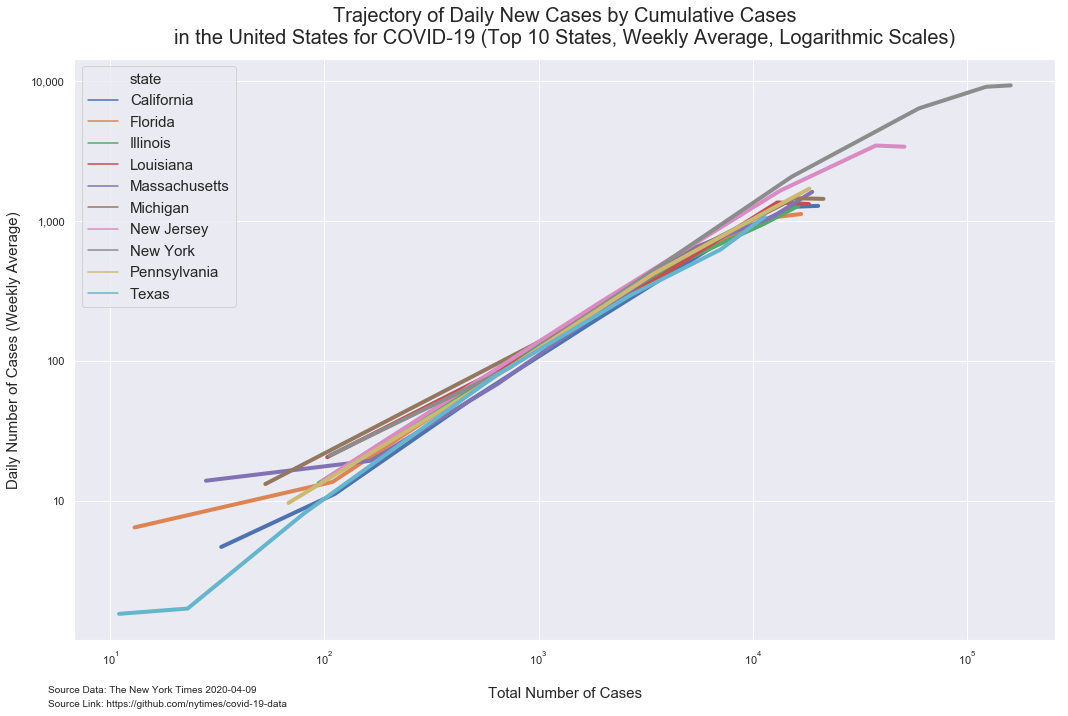

In [250]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="daily_cases_weekly_average",
             hue="state",
             data=trajectory_plot_weekly, linewidth=4)

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 10

ax1.legend(fontsize=15)
ax1.set_xlabel('Total Number of Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Trajectory of Daily New Cases by Cumulative Cases\nin the United States for COVID-19 (Top 10 States, Weekly Average, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-trajectory-weekly-plot')

# Trajectory for All States

In [251]:
trajectory_all_states = covid_19_state_data.sort_values(by=['state', 'date','cases'], 
                                ascending=[True, True, True])

In [252]:
trajectory_all_states

date    state  fips  cases  deaths
586  2020-03-13  Alabama     1      6       0
637  2020-03-14  Alabama     1     12       0
689  2020-03-15  Alabama     1     23       0
742  2020-03-16  Alabama     1     29       0
795  2020-03-17  Alabama     1     39       0
...         ...      ...   ...    ...     ...
1883 2020-04-05  Wyoming    56    200       0
1938 2020-04-06  Wyoming    56    212       0
1993 2020-04-07  Wyoming    56    221       0
2048 2020-04-08  Wyoming    56    230       0
2104 2020-04-09  Wyoming    56    239       0

[2105 rows x 5 columns]

In [253]:
trajectory_all_states['daily_cases'] = trajectory_all_states['cases'].diff()

In [254]:
trajectory_all_states[150:200]

date       state  fips  cases  deaths  daily_cases
1392 2020-03-28    Arkansas     5    409       5         23.0
1447 2020-03-29    Arkansas     5    449       6         40.0
1502 2020-03-30    Arkansas     5    508       7         59.0
1557 2020-03-31    Arkansas     5    564       8         56.0
1612 2020-04-01    Arkansas     5    624      10         60.0
1667 2020-04-02    Arkansas     5    683      12         59.0
1722 2020-04-03    Arkansas     5    738      12         55.0
1777 2020-04-04    Arkansas     5    743      14          5.0
1832 2020-04-05    Arkansas     5    853      16        110.0
1887 2020-04-06    Arkansas     5    927      16         74.0
1942 2020-04-07    Arkansas     5    997      18         70.0
1997 2020-04-08    Arkansas     5   1077      18         80.0
2053 2020-04-09    Arkansas     5   1146      21         69.0
5    2020-01-25  California     6      1       0      -1145.0
9    2020-01-26  California     6      2       0          1.0
13   2020-01-27  California     6      2       0          0.0
17   2020-01-28  California     6      2       0          0.0
21   2020-01-29  California     6      2       0          0.0
25   2020-01-30  California     6      2       0          0.0
29   2020-01-31  California     6      3       0          1.0
33   2020-02-01  California     6      3       0          0.0
38   2020-02-02  California     6      6       0          3.0
43   2020-02-03  California     6      6       0          0.0
48   2020-02-04  California     6      6       0          0.0
53   2020-02-05  California     6      6       0          0.0
59   2020-02-06  California     6      6       0          0.0
65   2020-02-07  California     6      6       0          0.0
71   2020-02-08  California     6      6       0          0.0
77   2020-02-09  California     6      6       0          0.0
83   2020-02-10  California     6      7       0          1.0
89   2020-02-11  California     6      7       0          0.0
95   2020-02-12  California     6      7       0          0.0
102  2020-02-13  California     6      7       0          0.0
109  2020-02-14  California     6      7       0          0.0
116  2020-02-15  California     6      7       0          0.0
123  2020-02-16  California     6      7       0          0.0
130  2020-02-17  California     6      7       0          0.0
138  2020-02-18  California     6      7       0          0.0
146  2020-02-19  California     6      7       0          0.0
154  2020-02-20  California     6      8       0          1.0
162  2020-02-21  California     6      9       0          1.0
170  2020-02-22  California     6      9       0          0.0
178  2020-02-23  California     6      9       0          0.0
186  2020-02-24  California     6     11       0          2.0
194  2020-02-25  California     6     11       0          0.0
203  2020-02-26  California     6     26       0         15.0
212  2020-02-27  California     6     26       0          0.0
221  2020-02-28  California     6     27       0          1.0
231  2020-02-29  California     6     28       0          1.0
241  2020-03-01  California     6     33       0          5.0

In [255]:
trajectory_all_states['daily_cases'].loc[trajectory_all_states.daily_cases < 0] = trajectory_all_states.cases
trajectory_all_states['daily_cases'].loc[trajectory_all_states.daily_cases.isnull()] = trajectory_all_states.cases

In [256]:
trajectory_all_states[:50]

date    state  fips  cases  deaths  daily_cases
586  2020-03-13  Alabama     1      6       0          6.0
637  2020-03-14  Alabama     1     12       0          6.0
689  2020-03-15  Alabama     1     23       0         11.0
742  2020-03-16  Alabama     1     29       0          6.0
795  2020-03-17  Alabama     1     39       0         10.0
849  2020-03-18  Alabama     1     51       0         12.0
903  2020-03-19  Alabama     1     78       0         27.0
957  2020-03-20  Alabama     1    106       0         28.0
1011 2020-03-21  Alabama     1    131       0         25.0
1065 2020-03-22  Alabama     1    157       0         26.0
1119 2020-03-23  Alabama     1    196       0         39.0
1173 2020-03-24  Alabama     1    242       0         46.0
1227 2020-03-25  Alabama     1    386       1        144.0
1281 2020-03-26  Alabama     1    538       3        152.0
1335 2020-03-27  Alabama     1    639       4        101.0
1389 2020-03-28  Alabama     1    720       4         81.0
1444 2020-03-29  Alabama     1    830       5        110.0
1499 2020-03-30  Alabama     1    947      11        117.0
1554 2020-03-31  Alabama     1    999      13         52.0
1609 2020-04-01  Alabama     1   1106      28        107.0
1664 2020-04-02  Alabama     1   1270      32        164.0
1719 2020-04-03  Alabama     1   1535      38        265.0
1774 2020-04-04  Alabama     1   1633      44         98.0
1829 2020-04-05  Alabama     1   1841      45        208.0
1884 2020-04-06  Alabama     1   2006      53        165.0
1939 2020-04-07  Alabama     1   2197      64        191.0
1994 2020-04-08  Alabama     1   2499      67        302.0
2049 2020-04-09  Alabama     1   2838      78        339.0
539  2020-03-12   Alaska     2      1       0          1.0
587  2020-03-13   Alaska     2      1       0          0.0
638  2020-03-14   Alaska     2      1       0          0.0
690  2020-03-15   Alaska     2      1       0          0.0
743  2020-03-16   Alaska     2      3       0          2.0
796  2020-03-17   Alaska     2      6       0          3.0
850  2020-03-18   Alaska     2      9       0          3.0
904  2020-03-19   Alaska     2     12       0          3.0
958  2020-03-20   Alaska     2     14       0          2.0
1012 2020-03-21   Alaska     2     21       0          7.0
1066 2020-03-22   Alaska     2     22       0          1.0
1120 2020-03-23   Alaska     2     36       0         14.0
1174 2020-03-24   Alaska     2     42       0          6.0
1228 2020-03-25   Alaska     2     59       0         17.0
1282 2020-03-26   Alaska     2     69       0         10.0
1336 2020-03-27   Alaska     2     85       1         16.0
1390 2020-03-28   Alaska     2    102       1         17.0
1445 2020-03-29   Alaska     2    114       1         12.0
1500 2020-03-30   Alaska     2    119       2          5.0
1555 2020-03-31   Alaska     2    133       2         14.0
1610 2020-04-01   Alaska     2    143       2         10.0
1665 2020-04-02   Alaska     2    146       2          3.0

In [257]:
trajectory_all_states = trajectory_all_states.set_index('date').groupby('state').resample('W').agg({'cases': np.max, 
                                                                                                    'daily_cases': np.mean})
trajectory_all_states.reset_index(inplace=True)
trajectory_all_states.rename(columns={'daily_cases': 'daily_cases_week_avg'}, inplace=True)

In [258]:
trajectory_all_states.head()

state       date  cases  daily_cases_week_avg
0  Alabama 2020-03-15     23              7.666667
1  Alabama 2020-03-22    157             19.142857
2  Alabama 2020-03-29    830             96.142857
3  Alabama 2020-04-05   1841            144.428571
4  Alabama 2020-04-12   2838            249.250000

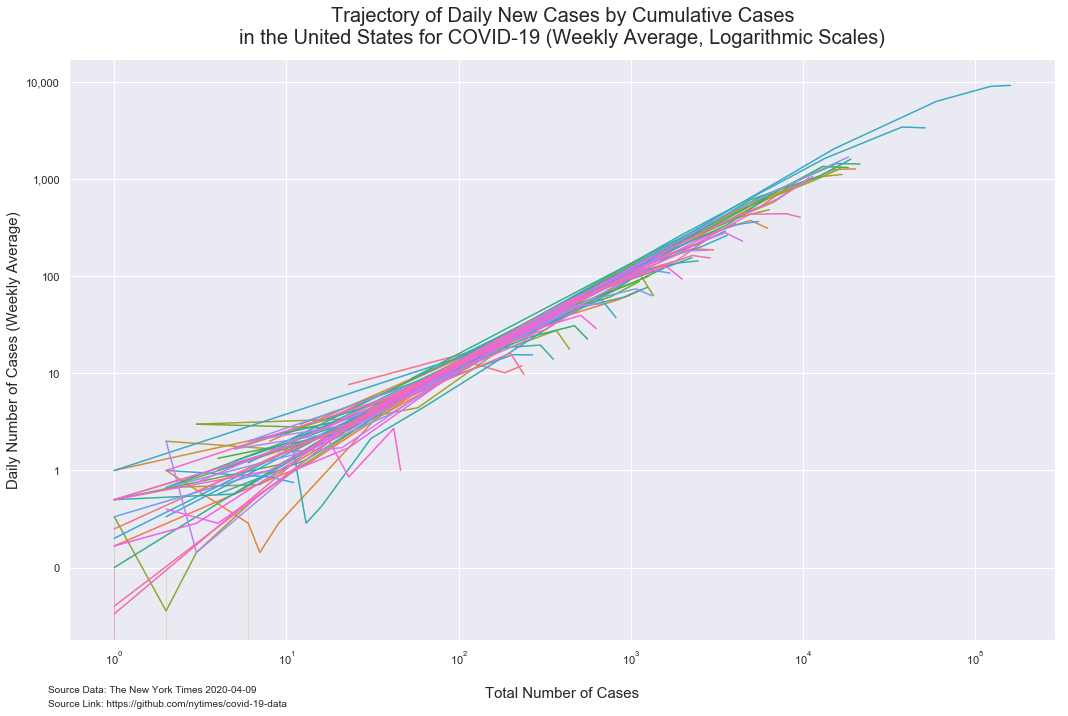

In [259]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="daily_cases_week_avg",
             hue="state",
             data=trajectory_all_states)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

ax1.legend_.remove()
ax1.set_xlabel('Total Number of Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Trajectory of Daily New Cases by Cumulative Cases\nin the United States for COVID-19 (Weekly Average, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-all-states-trajectory-weekly-plot')

In [260]:
trajectory_all_states_scatter = trajectory_all_states.sort_values(by=['date', 'cases'], 
                                              ascending=[False, False]).drop_duplicates(subset ="state", 
                                                                                        keep = 'first').reset_index(drop=True)

In [261]:
trajectory_all_states_scatter

state       date   cases  daily_cases_week_avg
0                   New York 2020-04-12  159937               9256.50
1                 New Jersey 2020-04-12   51027               3380.50
2                   Michigan 2020-04-12   21375               1435.00
3                 California 2020-04-12   20191               1278.75
4              Massachusetts 2020-04-12   18941               1610.25
5               Pennsylvania 2020-04-12   18379               1697.50
6                  Louisiana 2020-04-12   18283               1318.25
7                    Florida 2020-04-12   16819               1119.25
8                   Illinois 2020-04-12   16422               1286.50
9                      Texas 2020-04-12   11372               1069.50
10                   Georgia 2020-04-12   10885               1035.75
11               Connecticut 2020-04-12    9784               1027.25
12                Washington 2020-04-12    9608                406.00
13                   Indiana 2020-04-12    6351                485.00
14                  Colorado 2020-04-12    6202                313.00
15                  Maryland 2020-04-12    6185                644.00
16                      Ohio 2020-04-12    5512                367.25
17                 Tennessee 2020-04-12    4456                229.50
18                  Virginia 2020-04-12    4042                351.25
19            North Carolina 2020-04-12    3651                266.50
20                  Missouri 2020-04-12    3539                293.00
21                   Arizona 2020-04-12    3018                187.25
22                 Wisconsin 2020-04-12    2885                154.50
23                   Alabama 2020-04-12    2838                249.25
24            South Carolina 2020-04-12    2792                185.75
25                    Nevada 2020-04-12    2456                144.00
26               Mississippi 2020-04-12    2260                155.50
27                      Utah 2020-04-12    1980                 93.75
28              Rhode Island 2020-04-12    1727                201.25
29                  Oklahoma 2020-04-12    1684                108.00
30                  Kentucky 2020-04-12    1525                119.25
31      District of Columbia 2020-04-12    1523                131.25
32                     Idaho 2020-04-12    1353                 63.00
33                    Oregon 2020-04-12    1321                 63.25
34                      Iowa 2020-04-12    1270                100.50
35                 Minnesota 2020-04-12    1242                 76.75
36                  Delaware 2020-04-12    1209                134.00
37                  Arkansas 2020-04-12    1146                 73.25
38                    Kansas 2020-04-12    1116                 88.25
39                New Mexico 2020-04-12     989                 91.25
40             New Hampshire 2020-04-12     819                 37.50
41               Puerto Rico 2020-04-12     683                 52.00
42                   Vermont 2020-04-12     628                 29.00
43                  Nebraska 2020-04-12     594                 54.25
44                     Maine 2020-04-12     560                 22.50
45                      Guam 2020-04-12     542                 69.25
46             West Virginia 2020-04-12     524                 50.00
47              South Dakota 2020-04-12     447                 51.75
48                    Hawaii 2020-04-12     440                 17.75
49                   Montana 2020-04-12     354                 14.00
50              North Dakota 2020-04-12     269                 15.50
51                   Wyoming 2020-04-12     239                  9.75
52                    Alaska 2020-04-12     233                 12.00
53            Virgin Islands 2020-04-12      46                  1.00
54  Northern Mariana Islands 2020-04-12      11                  0.75
55            American Samoa 2020-04-12       0                  0.00

In [262]:
len(trajectory_all_states_scatter)

56

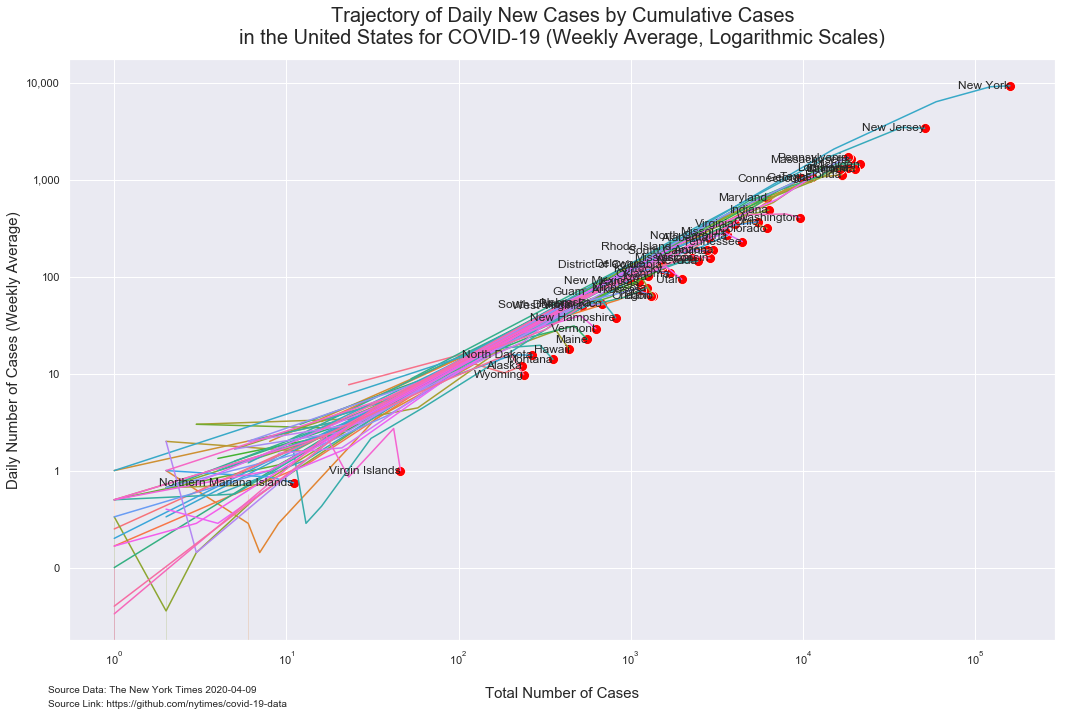

In [263]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="daily_cases_week_avg",
             hue="state",
             data=trajectory_all_states)

sns.scatterplot(x="cases", y="daily_cases_week_avg", 
             data=trajectory_all_states_scatter, s=100, ax=ax1, color='red')


x = trajectory_all_states_scatter.daily_cases_week_avg
z = trajectory_all_states_scatter.cases
n = trajectory_all_states_scatter.state
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12,
                 horizontalalignment='right', va='center', clip_on=True)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5
#ax1.set_xbound(lower=100)

ax1.legend_.remove()
ax1.set_xlabel('Total Number of Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Trajectory of Daily New Cases by Cumulative Cases\nin the United States for COVID-19 (Weekly Average, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-all-states-trajectory-weekly-plot-labels')

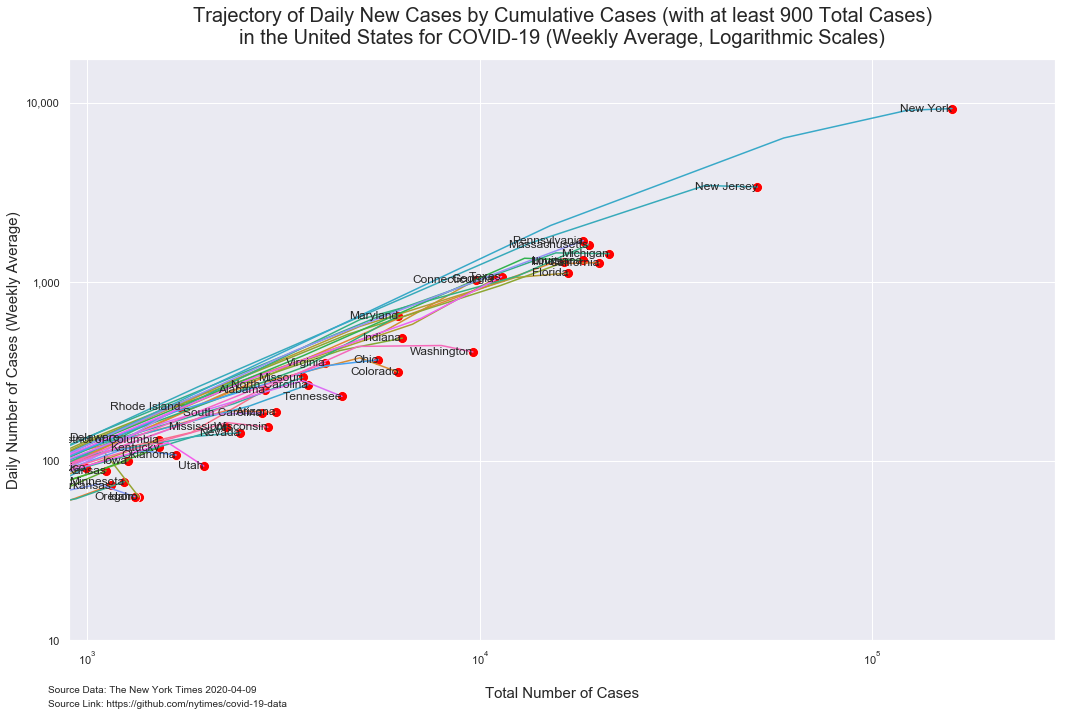

In [264]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="daily_cases_week_avg",
             hue="state",
             data=trajectory_all_states)

sns.scatterplot(x="cases", y="daily_cases_week_avg", 
             data=trajectory_all_states_scatter, s=100, ax=ax1, color='red')


x = trajectory_all_states_scatter.daily_cases_week_avg
z = trajectory_all_states_scatter.cases
n = trajectory_all_states_scatter.state
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12,
                 horizontalalignment='right', va='center', clip_on=True)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

plt.xlim(900)
plt.ylim(10)


ax1.legend_.remove()
ax1.set_xlabel('Total Number of Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Trajectory of Daily New Cases by Cumulative Cases (with at least 900 Total Cases)\nin the United States for COVID-19 (Weekly Average, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-all-states-trajectory-weekly-plot-labels-xlimit')

# Timeseries for USA

In [265]:
g = covid_19_state_data.groupby('date')['cases'].sum().reset_index()

g.set_index('date', drop=False, inplace=True)

g.index = pd.to_datetime(g.index, infer_datetime_format=True)

In [266]:
g.index.dtype

dtype('<M8[ns]')

In [267]:
g.head()

date  cases
date                        
2020-01-21 2020-01-21      1
2020-01-22 2020-01-22      1
2020-01-23 2020-01-23      1
2020-01-24 2020-01-24      2
2020-01-25 2020-01-25      3

In [268]:
g.tail()

date   cases
date                         
2020-04-05 2020-04-05  336774
2020-04-06 2020-04-06  366238
2020-04-07 2020-04-07  397754
2020-04-08 2020-04-08  429319
2020-04-09 2020-04-09  463684

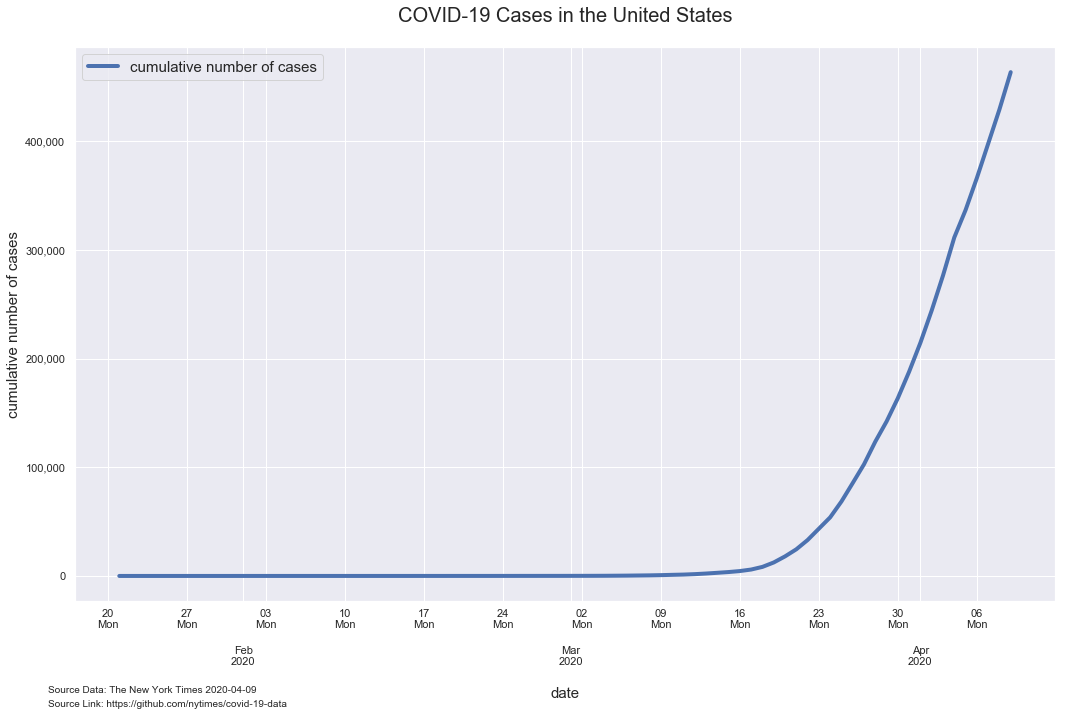

In [269]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

ax1.plot(g['cases'], linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.set_xlabel('date', fontsize=15, labelpad = 20)
ax1.set_ylabel('cumulative number of cases', fontsize=15)

ax1.grid(True)
ax1.grid(which='minor')

ax1.legend(['cumulative number of cases'], loc=2, fontsize=15)
plt.title('COVID-19 Cases in the United States', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-linear')

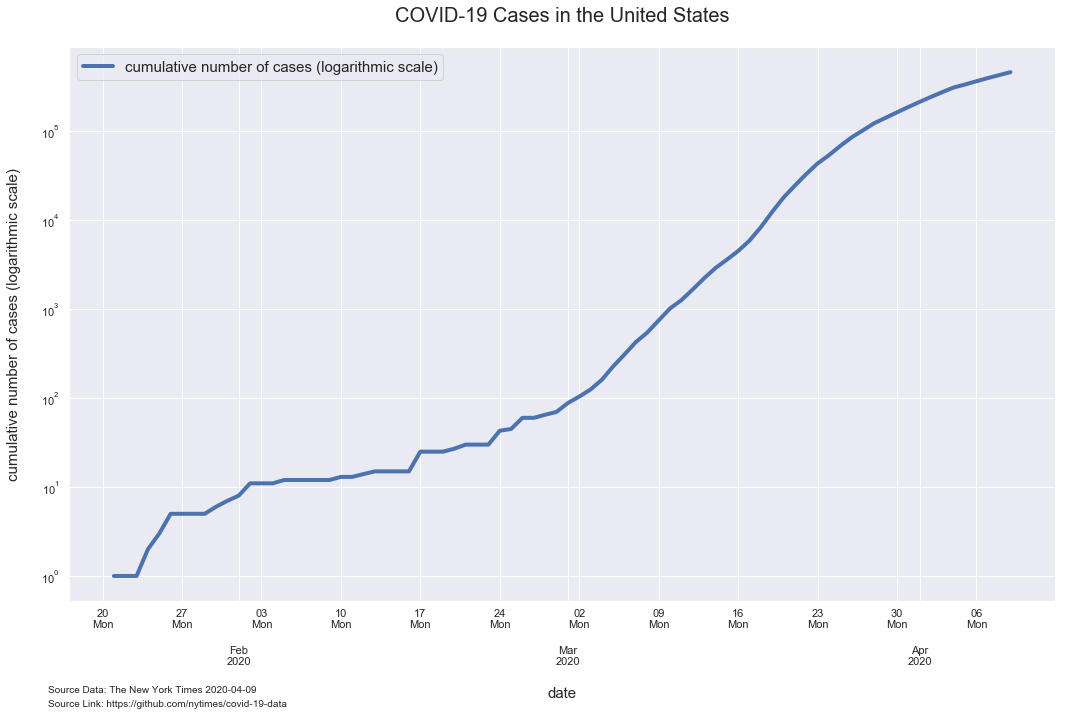

In [270]:
fig, ax2 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

ax2.plot(g['cases'], linewidth=4)

ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax2.xaxis.grid(True, which="major")
ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax2.set_xlabel('date', fontsize=15, labelpad = 20)
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15, labelpad = 20)

ax2.grid(True)
ax2.grid(which='minor', axis='x')

ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=0, fontsize=15)
plt.title('COVID-19 Cases in the United States', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

ax2.set_yscale('log')
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-log')

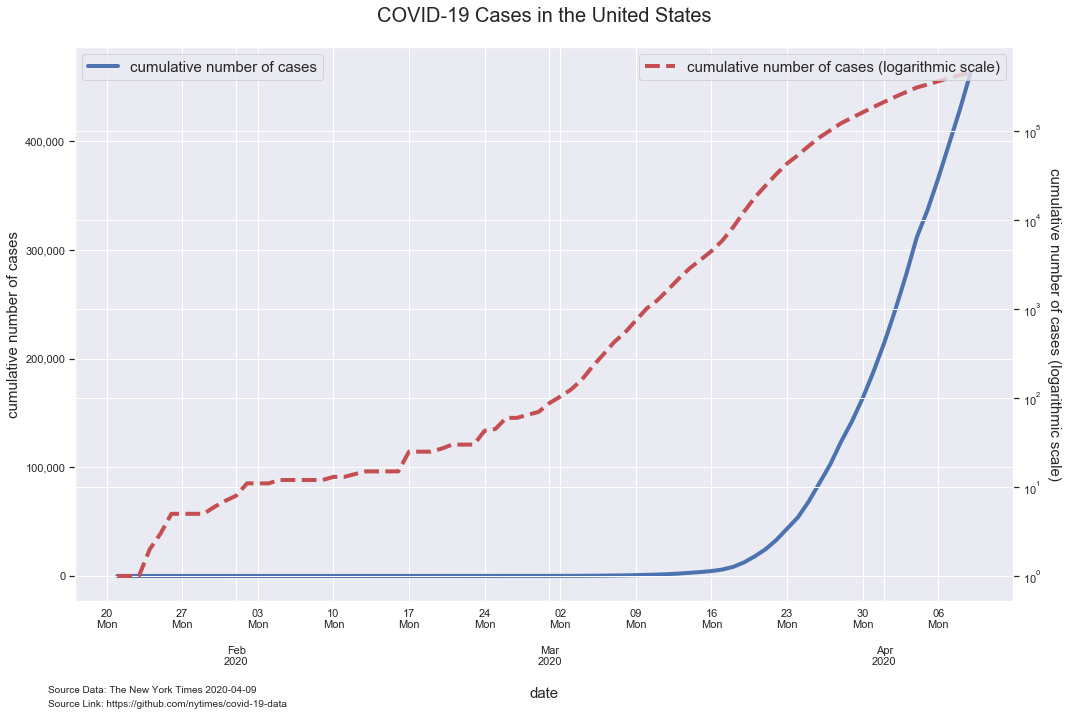

In [271]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

# Plot 1
ax1.plot(g['cases'], linewidth=4)

# Plot 2
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(g['cases'], linewidth=4, color='r', linestyle='dashed')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0),interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))

ax1.set_ylabel('cumulative number of cases', fontsize=15)
ax1.set_xlabel('date', fontsize=15, labelpad = 20)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15, rotation = 270, labelpad = 20)
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.get_yaxis().set_visible(True)
ax2.set_yscale('log')

ax1.grid(True)
ax1.grid(which='minor')
ax2.tick_params(axis='both', which='minor', length=0)
plt.setp(ax2.get_yticklabels(), visible=True)

ax1.legend(['cumulative number of cases'], loc=2, fontsize=15)
ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=1, fontsize=15)
plt.title('COVID-19 Cases in the United States', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-overlay')

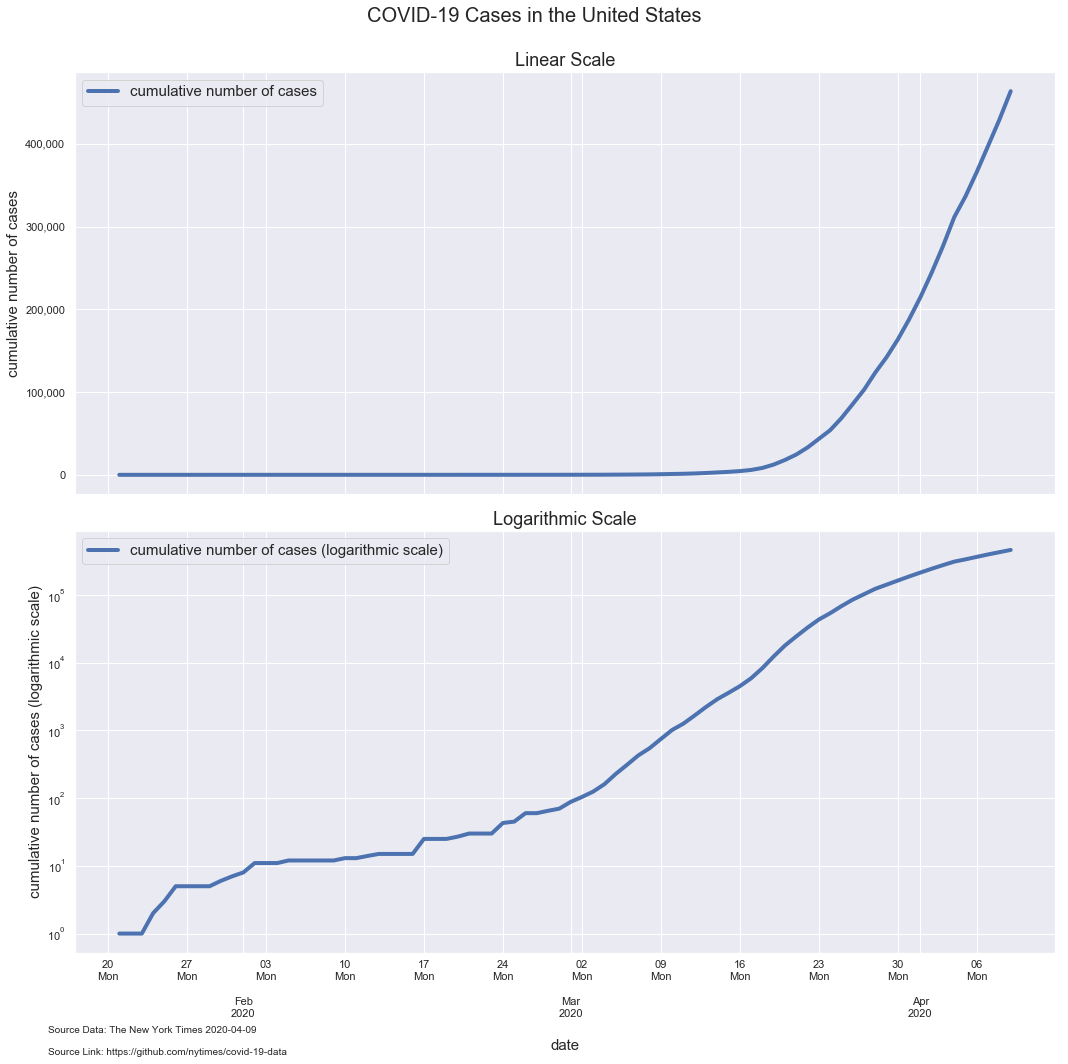

In [272]:
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True, figsize=(15,15))
fig.suptitle('COVID-19 Cases in the United States', fontsize=20)
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

# Plot 1
ax1.plot(g['cases'], linewidth=4)
ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.set_ylabel('cumulative number of cases', fontsize=15)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Formatting Grid
ax1.grid(True)
ax1.grid(which='minor')

# Plot 2
ax2.plot(g['cases'], linewidth=4)
ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
ax2.set_xlabel('date', fontsize=15, labelpad = 20)
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax2.xaxis.grid(True, which="major")
ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Formatting Grid
ax2.grid(True)
ax2.grid(which='minor', axis='x')

# Formatting Figure
ax1.legend(['cumulative number of cases'], loc=2, fontsize=15)
ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=2, fontsize=15)
ax1.set_title('Linear Scale', fontsize=18)
ax2.set_title('Logarithmic Scale', fontsize=18)
ax2.set_yscale('log')

plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.savefig('figures/nyt-covid-19-data-2-subplots')

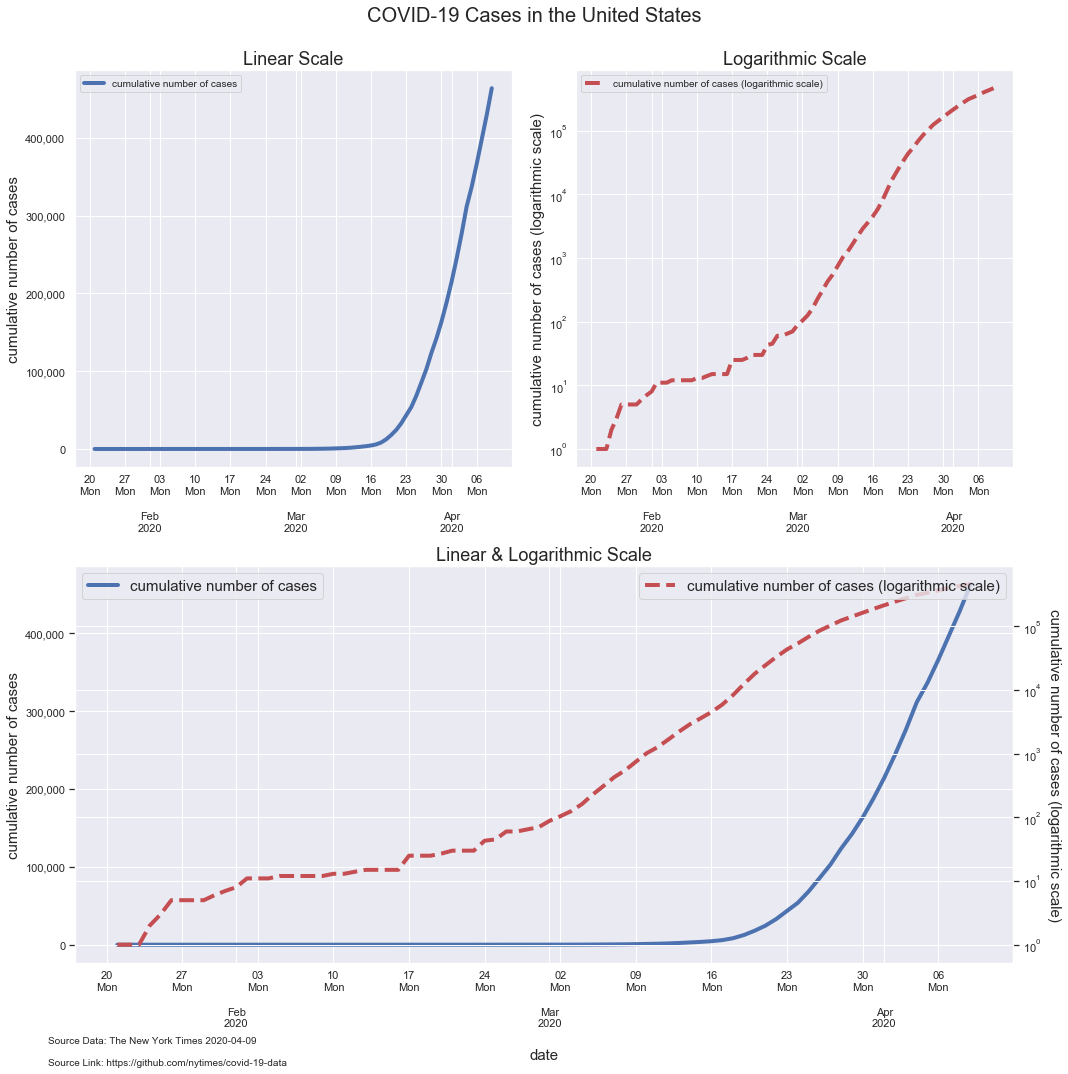

In [273]:
fig, [ax1, ax2, ax3, ax3_1] = plt.subplots(4, 1, sharex=True, figsize=(15,15))
fig.suptitle('COVID-19 Cases in the United States', y = .99, fontsize=20)
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

# Plot 1
ax3 = plt.subplot(212)
ax3.plot(g['cases'], linewidth=4)
ax3.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax3.set_xlabel('Date', fontsize=15, labelpad = 20)
ax3.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax3_1 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
ax3_1.plot(g['cases'], linewidth=4, color='r', linestyle='dashed')
ax3_1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax3_1.xaxis.grid(True, which="major")
ax3_1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3_1.set_yscale('log')

ax3.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax3.xaxis.grid(True, which="major")
ax3.xaxis.set_major_locator(dates.MonthLocator())
ax3.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Plot 2
ax1 = plt.subplot(221)
ax1.plot(g['cases'], linewidth=4)
ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))


# Plot 3
ax2 = plt.subplot(222)
ax2.plot(g['cases'], linewidth=4, color='r', linestyle='dashed')
ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))

ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax2.xaxis.grid(True, which="major")
ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Formatting Grid
ax1.grid(True)
ax1.grid(which='minor')
ax2.grid(True)
ax2.grid(which='minor', axis='x')
ax3.grid(True)
ax3.grid(which='minor')
ax3_1.grid(True)
ax3_1.grid(which='minor', axis='x')
ax3_1.tick_params(axis='both', which='minor', length=0)

# Setting Labels
ax1.set_ylabel('cumulative number of cases', fontsize=15)
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
ax3.set_ylabel('cumulative number of cases', fontsize=15)
ax3.set_xlabel('date', fontsize=15, labelpad = 20)
ax3_1.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15, rotation = 270, labelpad = 20)
ax2.get_yaxis().set_visible(True)
ax2.set_yscale('log')
ax2.get_yaxis().set_visible(True)
ax3_1.get_yaxis().set_visible(True)
ax3_1.set_yscale('log')
ax3_1.get_yaxis().set_visible(True)

# Setting Titles
ax1.set_title('\n\nLinear Scale', fontsize=18)
ax2.set_title('Logarithmic Scale', fontsize=18)
ax3.set_title('Linear & Logarithmic Scale', fontsize=18)

# Setting Legends
ax1.legend(['cumulative number of cases'], loc=2, fontsize=10)
ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=2, fontsize=10)
ax3.legend(['cumulative number of cases'], loc=2, fontsize=15)
ax3_1.legend(['cumulative number of cases (logarithmic scale)'], loc=1, fontsize=15)

plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-3-subplots')

# Country Trajectory Plot

In [274]:
g['daily_cases'] = g['cases'].diff()

In [275]:
g.head(20)

date  cases  daily_cases
date                                     
2020-01-21 2020-01-21      1          NaN
2020-01-22 2020-01-22      1          0.0
2020-01-23 2020-01-23      1          0.0
2020-01-24 2020-01-24      2          1.0
2020-01-25 2020-01-25      3          1.0
2020-01-26 2020-01-26      5          2.0
2020-01-27 2020-01-27      5          0.0
2020-01-28 2020-01-28      5          0.0
2020-01-29 2020-01-29      5          0.0
2020-01-30 2020-01-30      6          1.0
2020-01-31 2020-01-31      7          1.0
2020-02-01 2020-02-01      8          1.0
2020-02-02 2020-02-02     11          3.0
2020-02-03 2020-02-03     11          0.0
2020-02-04 2020-02-04     11          0.0
2020-02-05 2020-02-05     12          1.0
2020-02-06 2020-02-06     12          0.0
2020-02-07 2020-02-07     12          0.0
2020-02-08 2020-02-08     12          0.0
2020-02-09 2020-02-09     12          0.0

In [276]:
g['daily_cases'].loc[g.daily_cases < 0] = g.cases
g['daily_cases'].loc[g.daily_cases.isnull()] = g.cases

In [277]:
g[:50]

date  cases  daily_cases
date                                     
2020-01-21 2020-01-21      1          1.0
2020-01-22 2020-01-22      1          0.0
2020-01-23 2020-01-23      1          0.0
2020-01-24 2020-01-24      2          1.0
2020-01-25 2020-01-25      3          1.0
2020-01-26 2020-01-26      5          2.0
2020-01-27 2020-01-27      5          0.0
2020-01-28 2020-01-28      5          0.0
2020-01-29 2020-01-29      5          0.0
2020-01-30 2020-01-30      6          1.0
2020-01-31 2020-01-31      7          1.0
2020-02-01 2020-02-01      8          1.0
2020-02-02 2020-02-02     11          3.0
2020-02-03 2020-02-03     11          0.0
2020-02-04 2020-02-04     11          0.0
2020-02-05 2020-02-05     12          1.0
2020-02-06 2020-02-06     12          0.0
2020-02-07 2020-02-07     12          0.0
2020-02-08 2020-02-08     12          0.0
2020-02-09 2020-02-09     12          0.0
2020-02-10 2020-02-10     13          1.0
2020-02-11 2020-02-11     13          0.0
2020-02-12 2020-02-12     14          1.0
2020-02-13 2020-02-13     15          1.0
2020-02-14 2020-02-14     15          0.0
2020-02-15 2020-02-15     15          0.0
2020-02-16 2020-02-16     15          0.0
2020-02-17 2020-02-17     25         10.0
2020-02-18 2020-02-18     25          0.0
2020-02-19 2020-02-19     25          0.0
2020-02-20 2020-02-20     27          2.0
2020-02-21 2020-02-21     30          3.0
2020-02-22 2020-02-22     30          0.0
2020-02-23 2020-02-23     30          0.0
2020-02-24 2020-02-24     43         13.0
2020-02-25 2020-02-25     45          2.0
2020-02-26 2020-02-26     60         15.0
2020-02-27 2020-02-27     60          0.0
2020-02-28 2020-02-28     65          5.0
2020-02-29 2020-02-29     70          5.0
2020-03-01 2020-03-01     88         18.0
2020-03-02 2020-03-02    104         16.0
2020-03-03 2020-03-03    125         21.0
2020-03-04 2020-03-04    161         36.0
2020-03-05 2020-03-05    228         67.0
2020-03-06 2020-03-06    311         83.0
2020-03-07 2020-03-07    428        117.0
2020-03-08 2020-03-08    547        119.0
2020-03-09 2020-03-09    748        201.0
2020-03-10 2020-03-10   1018        270.0

In [278]:
g_weekly = g.set_index('date').resample('W').agg({'cases': np.max, 'daily_cases': np.mean})

In [279]:
g_weekly

cases   daily_cases
date                            
2020-01-26       5      0.833333
2020-02-02      11      0.857143
2020-02-09      12      0.142857
2020-02-16      15      0.428571
2020-02-23      30      2.142857
2020-03-01      88      8.285714
2020-03-08     547     65.571429
2020-03-15    3600    436.142857
2020-03-22   33061   4208.714286
2020-03-29  142194  15590.428571
2020-04-05  336774  27797.142857
2020-04-12  463684  31727.500000

In [280]:
g_weekly.reset_index(inplace=True)
g_weekly.rename(columns={'cases_diff': 'cases_daily_week_avg'}, inplace=True)

In [281]:
g_weekly

date   cases   daily_cases
0  2020-01-26       5      0.833333
1  2020-02-02      11      0.857143
2  2020-02-09      12      0.142857
3  2020-02-16      15      0.428571
4  2020-02-23      30      2.142857
5  2020-03-01      88      8.285714
6  2020-03-08     547     65.571429
7  2020-03-15    3600    436.142857
8  2020-03-22   33061   4208.714286
9  2020-03-29  142194  15590.428571
10 2020-04-05  336774  27797.142857
11 2020-04-12  463684  31727.500000

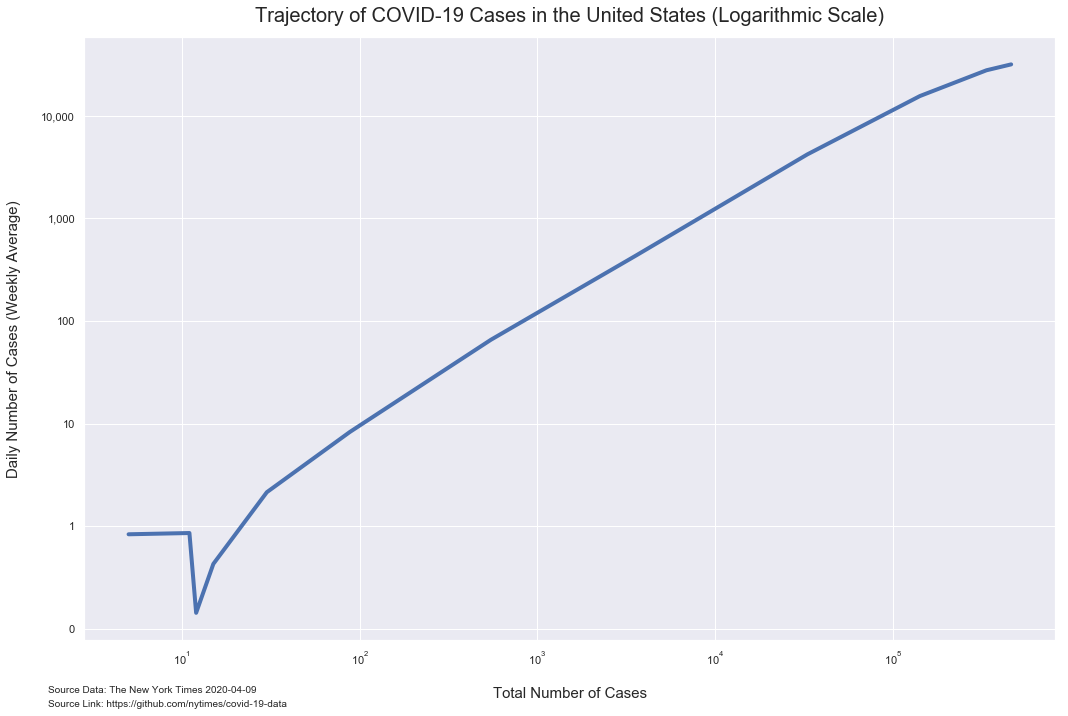

In [282]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="daily_cases", data=g_weekly, linewidth=4)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.set_xlabel('Total Number of Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Trajectory of COVID-19 Cases in the United States (Logarithmic Scale)', 
          pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-usa-trajectory-weekly-plot')

# Bar Chart

In [283]:
covid_19_state_data

date          state  fips  cases  deaths
0    2020-01-21     Washington    53      1       0
1    2020-01-22     Washington    53      1       0
2    2020-01-23     Washington    53      1       0
3    2020-01-24       Illinois    17      1       0
4    2020-01-24     Washington    53      1       0
...         ...            ...   ...    ...     ...
2100 2020-04-09       Virginia    51   4042     109
2101 2020-04-09     Washington    53   9608     456
2102 2020-04-09  West Virginia    54    524       5
2103 2020-04-09      Wisconsin    55   2885     116
2104 2020-04-09        Wyoming    56    239       0

[2105 rows x 5 columns]

In [284]:
# dropping ALL duplicate values 
state_current_cases = covid_19_state_data.sort_values(by = 'date', 
                    ascending=False).drop_duplicates(
                    subset ="state", keep = 'first')

In [285]:
state_current_cases.head()

date          state  fips  cases  deaths
2104 2020-04-09        Wyoming    56    239       0
2076 2020-04-09       Missouri    29   3539      94
2074 2020-04-09      Minnesota    27   1242      50
2073 2020-04-09       Michigan    26  21375    1076
2072 2020-04-09  Massachusetts    25  18941     503

In [286]:
state_current_cases.state.value_counts()

Georgia                     1
Nevada                      1
Pennsylvania                1
Tennessee                   1
Kentucky                    1
Florida                     1
Virgin Islands              1
Washington                  1
New Hampshire               1
Maryland                    1
Iowa                        1
Massachusetts               1
New Jersey                  1
Guam                        1
Mississippi                 1
North Carolina              1
Maine                       1
American Samoa              1
Alaska                      1
Louisiana                   1
Virginia                    1
Ohio                        1
California                  1
Delaware                    1
Minnesota                   1
Colorado                    1
Wyoming                     1
Illinois                    1
West Virginia               1
North Dakota                1
Puerto Rico                 1
Hawaii                      1
Alabama                     1
Nebraska  

In [287]:
state_current_cases.loc[state_current_cases.state == 'New York']

date     state  fips   cases  deaths
2083 2020-04-09  New York    36  159937    7067

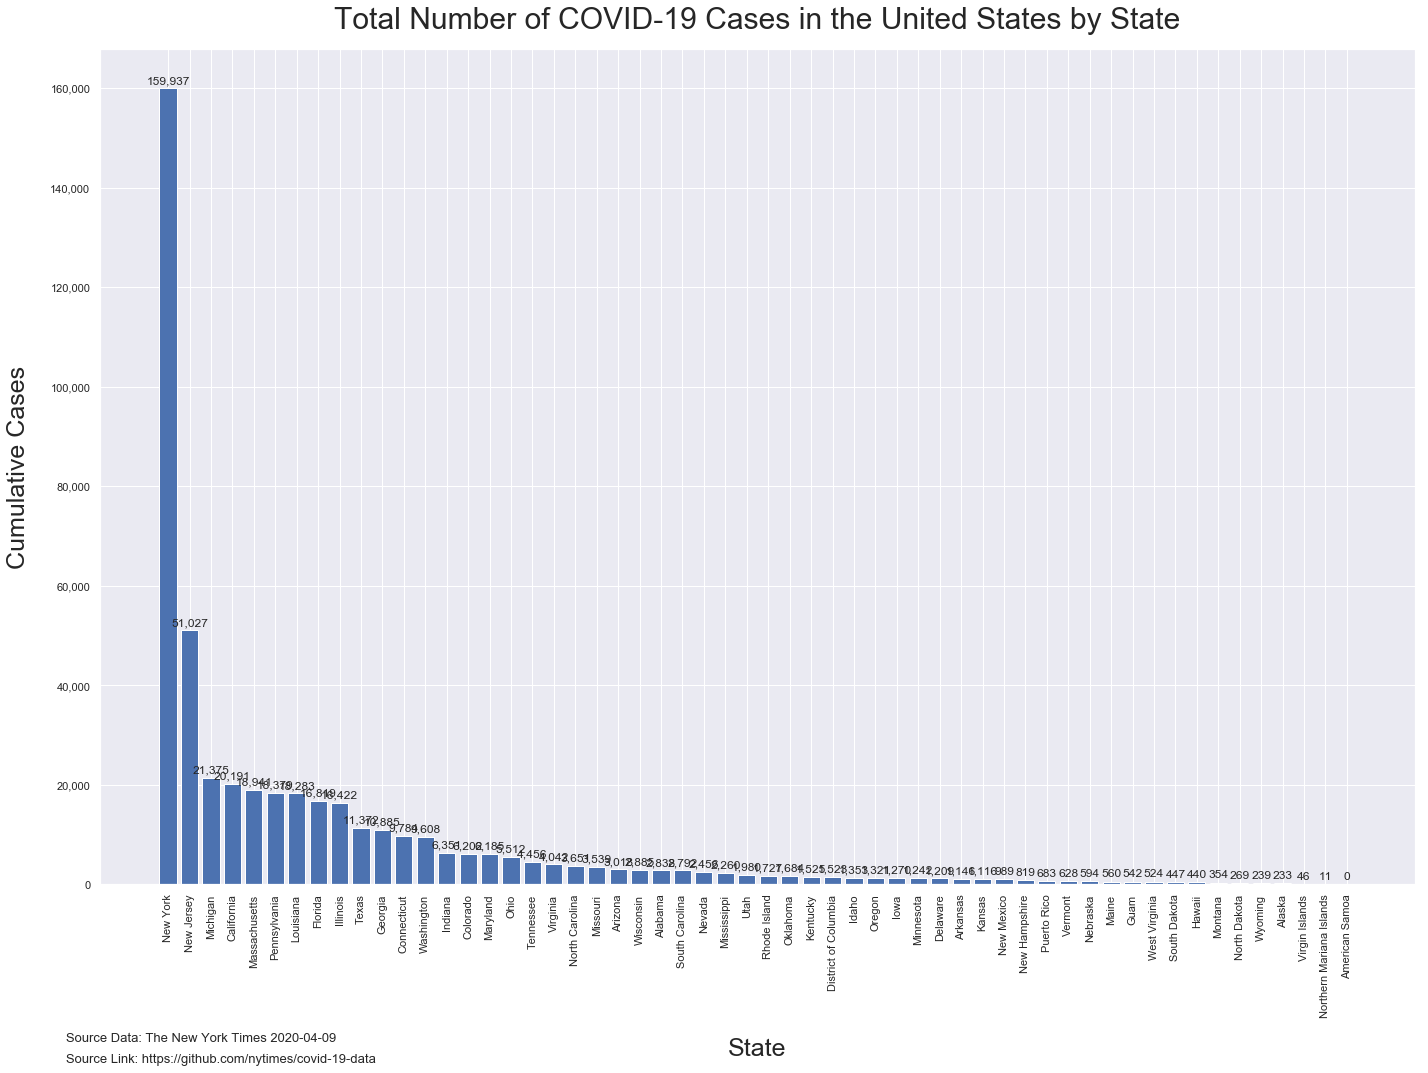

In [288]:
bar = state_current_cases.sort_values(by = 'cases', 
                    ascending=False)
bar.set_index('state', drop=False, inplace=True)

plt.subplots(figsize=(20,15))
ax = plt.subplot()

label = ax.bar(bar.index, bar.cases)
plt.xlabel("State", labelpad=14, fontsize=25)
plt.xticks(rotation=90)
plt.ylabel("Cumulative Cases", labelpad=14, fontsize=25)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:,}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(label)

txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=13)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=13)

plt.title("Total Number of COVID-19 Cases in the United States by State", pad=20, fontsize=30)
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-bar')

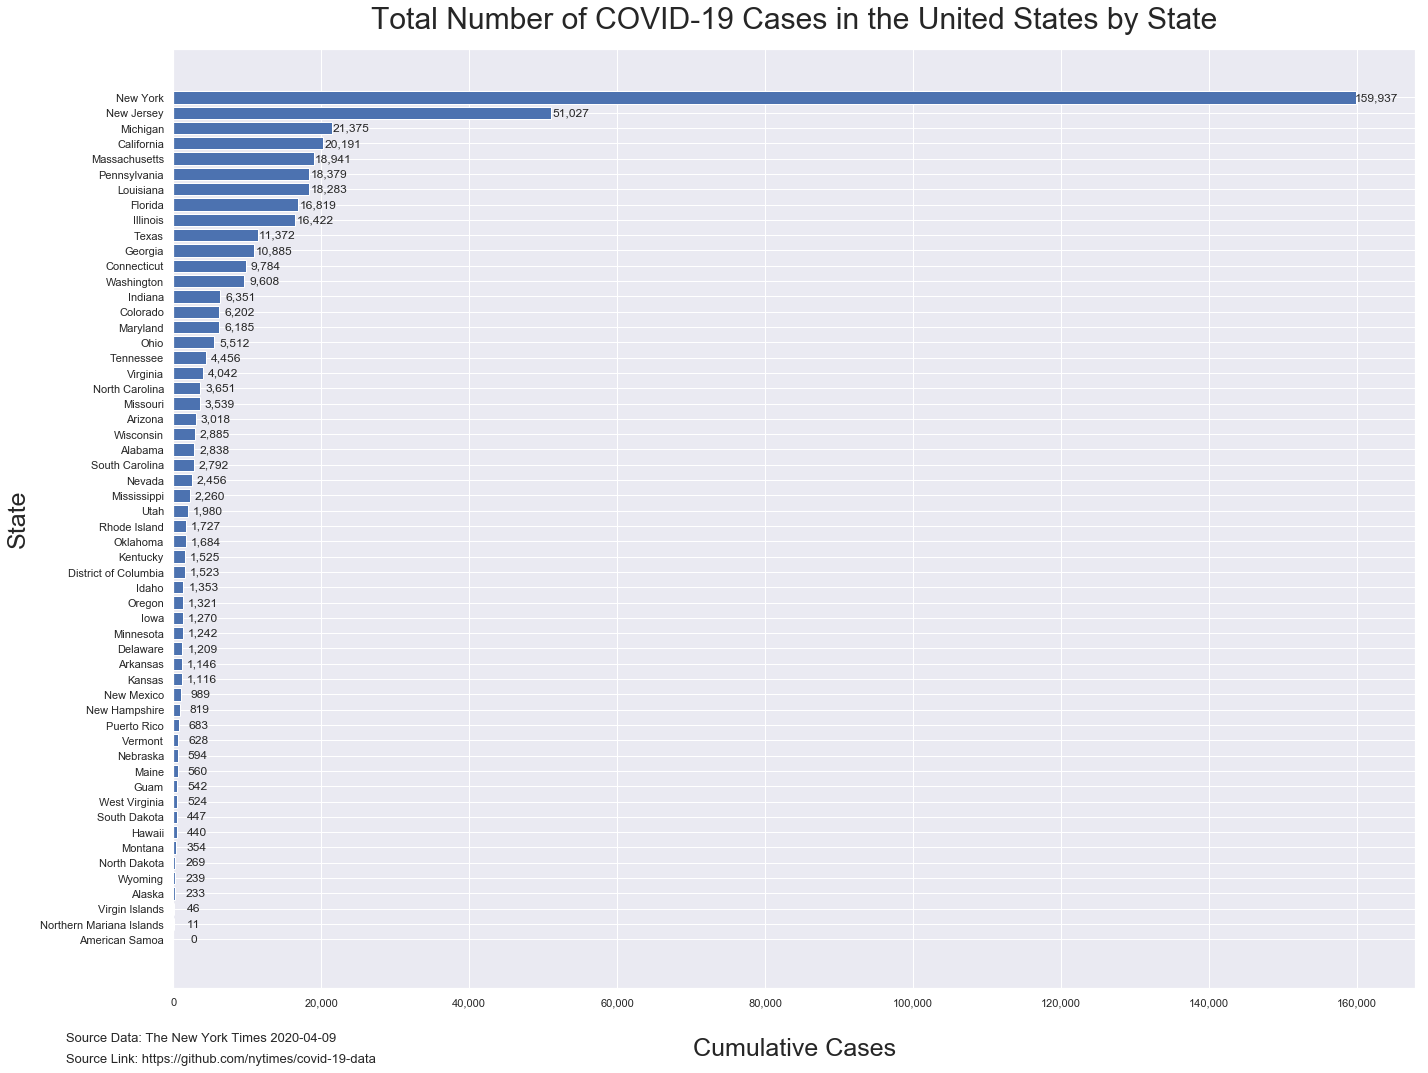

In [289]:
bar = state_current_cases.sort_values(by = 'cases', 
                    ascending=True)
bar.set_index('state', drop=False, inplace=True)

plt.subplots(figsize=(20,15))
ax = plt.subplot()

label_1 = ax.barh(bar.index, bar.cases)
plt.xlabel("Cumulative Cases", labelpad=14, fontsize=25)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("State", labelpad=14, fontsize=25)
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 10

def autolabel_1(rects):
    for rect in rects:
        width = rect.get_width()
        yloc = rect.get_y() + rect.get_height() / 2
        ax.annotate('{:,}'.format(width), 
                    xy=(width, yloc), 
                    xytext=(20, 0),
                    textcoords="offset points",
                    ha='center', va='center')
                
autolabel_1(label_1)

txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=13)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=13)

plt.title("Total Number of COVID-19 Cases in the United States by State", pad=20, fontsize=30)
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-barh')

# I have downloaded the shapefile already

In [290]:
#url = 'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip'

# data_path = 'data'
# fullfilename = os.path.join(data_path, 'state_shape.gz')
# urllib.request.urlretrieve(url, fullfilename)

In [291]:
#file_path = 'data/state_shape.gz'

# items = zipfile.ZipFile(file_path)

# available files in the container
# print(items.namelist())

In [292]:
# opening Zip using 'with' keyword in read mode
# with zipfile.ZipFile(file_path, 'r') as file:
#     file.extractall(data_path)

In [293]:
states_shape = gpd.GeoDataFrame.from_file('data/cb_2018_us_state_500k.shp')

In [294]:
states_shape.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry  
0  (POLYGON ((-88.502966 30.215235, -88.491759 30...  
1  (POLYGON ((-75.72680699999999 35.935844, -75.7...  
2  POLYGON ((-103.002565 36.526588, -103.002188 3...  
3  (POLYGON ((-75.742406 37.80835, -75.741512 37....  
4  POLYGON ((-82.6431981036679 38.1690897960737, ...

In [295]:
states_shape.sort_values(by='NAME')

STATEFP   STATENS     AFFGEOID GEOID STUSPS  \
17      01  01779775  0400000US01    01     AL   
27      02  01785533  0400000US02    02     AK   
37      60  01802701  0400000US60    60     AS   
35      04  01779777  0400000US04    04     AZ   
52      05  00068085  0400000US05    05     AR   
16      06  01779778  0400000US06    06     CA   
21      08  01779779  0400000US08    08     CO   
45      69  01779809  0400000US69    69     MP   
55      09  01779780  0400000US09    09     CT   
43      10  01779781  0400000US10    10     DE   
36      11  01702382  0400000US11    11     DC   
9       12  00294478  0400000US12    12     FL   
18      13  01705317  0400000US13    13     GA   
44      66  01802705  0400000US66    66     GU   
42      15  01779782  0400000US15    15     HI   
8       16  01779783  0400000US16    16     ID   
29      17  01779784  0400000US17    17     IL   
53      18  00448508  0400000US18    18     IN   
32      19  01779785  0400000US19    19     IA   
26      20  00481813  0400000US20    20     KS   
47      21  01779786  0400000US21    21     KY   
5       22  01629543  0400000US22    22     LA   
41      23  01779787  0400000US23    23     ME   
40      24  01714934  0400000US24    24     MD   
7       25  00606926  0400000US25    25     MA   
6       26  01779789  0400000US26    26     MI   
54      27  00662849  0400000US27    27     MN   
0       28  01779790  0400000US28    28     MS   
20      29  01779791  0400000US29    29     MO   
31      30  00767982  0400000US30    30     MT   
10      31  01779792  0400000US31    31     NE   
28      32  01779793  0400000US32    32     NV   
34      33  01779794  0400000US33    33     NH   
39      34  01779795  0400000US34    34     NJ   
12      35  00897535  0400000US35    35     NM   
25      36  01779796  0400000US36    36     NY   
1       37  01027616  0400000US37    37     NC   
51      38  01779797  0400000US38    38     ND   
48      39  01085497  0400000US39    39     OH   
2       40  01102857  0400000US40    40     OK   
50      41  01155107  0400000US41    41     OR   
19      42  01779798  0400000US42    42     PA   
13      72  01779808  0400000US72    72     PR   
46      44  01219835  0400000US44    44     RI   
33      45  01779799  0400000US45    45     SC   
14      46  01785534  0400000US46    46     SD   
23      47  01325873  0400000US47    47     TN   
15      48  01779801  0400000US48    48     TX   
38      78  01802710  0400000US78    78     VI   
22      49  01455989  0400000US49    49     UT   
30      50  01779802  0400000US50    50     VT   
3       51  01779803  0400000US51    51     VA   
11      53  01779804  0400000US53    53     WA   
4       54  01779805  0400000US54    54     WV   
49      55  01779806  0400000US55    55     WI   
24      56  01779807  0400000US56    56     WY   

                                            NAME LSAD          ALAND  \
17                                       Alabama   00   131174048583   
27                                        Alaska   00  1478839695958   
37                                American Samoa   00      197759063   
35                                       Arizona   00   294198551143   
52                                      Arkansas   00   134768872727   
16                                    California   00   403503931312   
21                                      Colorado   00   268422891711   
45  Commonwealth of the Northern Mariana Islands   00      472292529   
55                                   Connecticut   00    12542497068   
43                                      Delaware   00     5045925646   
36                          District of Columbia   00      158340391   
9                                        Florida   00   138949136250   
18                                       Georgia   00   149482048342   
44                                          Guam   00      543555840   
42                                        Hawaii   00    16633990195   


In [296]:
bar_drop_index = bar.reset_index(drop=True)

states_shape_cases = states_shape.merge(bar_drop_index, left_on='NAME', right_on='state')

In [297]:
states_shape_cases.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry       date  \
0  (POLYGON ((-88.502966 30.215235, -88.491759 30... 2020-04-09   
1  (POLYGON ((-75.72680699999999 35.935844, -75.7... 2020-04-09   
2  POLYGON ((-103.002565 36.526588, -103.002188 3... 2020-04-09   
3  (POLYGON ((-75.742406 37.80835, -75.741512 37.... 2020-04-09   
4  POLYGON ((-82.6431981036679 38.1690897960737, ... 2020-04-09   

            state  fips  cases  deaths  
0     Mississippi    28   2260      76  
1  North Carolina    37   3651      74  
2        Oklahoma    40   1684      80  
3        Virginia    51   4042     109  
4   West Virginia    54    524       5

In [298]:
states_shape_cases.STUSPS.unique()

array(['MS', 'NC', 'OK', 'VA', 'WV', 'LA', 'MI', 'MA', 'ID', 'FL', 'NE',
       'WA', 'NM', 'PR', 'SD', 'TX', 'CA', 'AL', 'GA', 'PA', 'MO', 'CO',
       'UT', 'TN', 'WY', 'NY', 'KS', 'AK', 'NV', 'IL', 'VT', 'MT', 'IA',
       'SC', 'NH', 'AZ', 'DC', 'AS', 'NJ', 'MD', 'ME', 'HI', 'DE', 'GU',
       'RI', 'KY', 'OH', 'WI', 'OR', 'ND', 'AR', 'IN', 'MN', 'CT'],
      dtype=object)

(-2259318.989842429,
 2743787.7776512564,
 -2259441.9737315555,
 874818.5571526419)

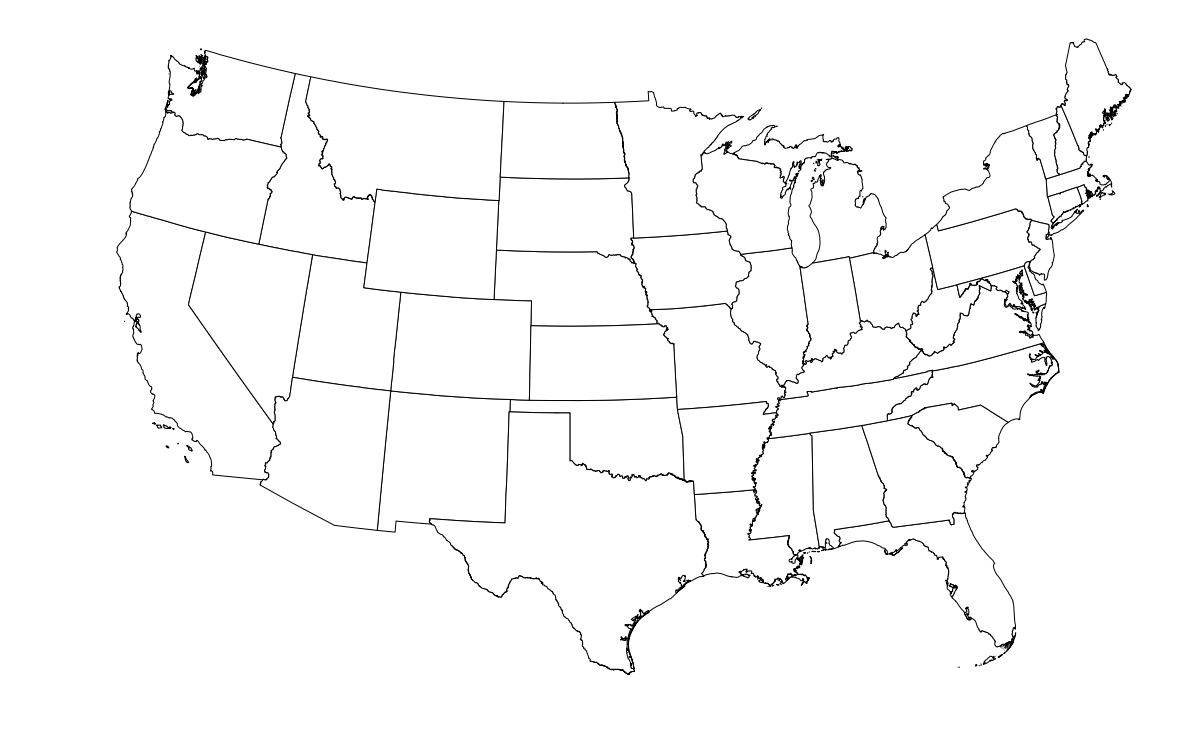

In [299]:
fig, ax = plt.subplots(figsize=(20,15))

delete_states = ['AK', 'AS', 'HI', 'PR', 'GU']
states_shape_cases  = states_shape_cases.loc[~states_shape_cases['STUSPS'].isin(delete_states)]
states_shape_cases = states_shape_cases.to_crs(epsg=2163)

states_shape_cases.plot(ax=ax, color='w', edgecolor='black')

# Insert comment here
plt.axis('off')

In [300]:
states_shape_cases['point'] = states_shape_cases['geometry'].centroid
state_points = states_shape_cases[['point', 'NAME', 'cases']]
state_points = state_points.set_geometry('point')
state_points['coords'] = state_points['point'].apply(lambda x: x.representative_point().coords[:])
state_points['coords'] = [state_points[0] for state_points in state_points['coords']]

In [301]:
state_points.head()

point            NAME  cases  \
0  POINT (968900.5142401541 -1302349.006773153)     Mississippi   2260   
1  POINT (1849270.427707764 -820703.8884651705)  North Carolina   3651   
2  POINT (227351.7828779383 -1041651.468761091)        Oklahoma   1684   
3  POINT (1846721.444074068 -594717.0352157739)        Virginia   4042   
4  POINT (1666480.709214782 -511066.3749840383)   West Virginia    524   

                                     coords  
0  (968900.5142401541, -1302349.0067731533)  
1  (1849270.4277077643, -820703.8884651705)  
2  (227351.7828779383, -1041651.4687610908)  
3  (1846721.4440740685, -594717.0352157739)  
4   (1666480.709214782, -511066.3749840383)

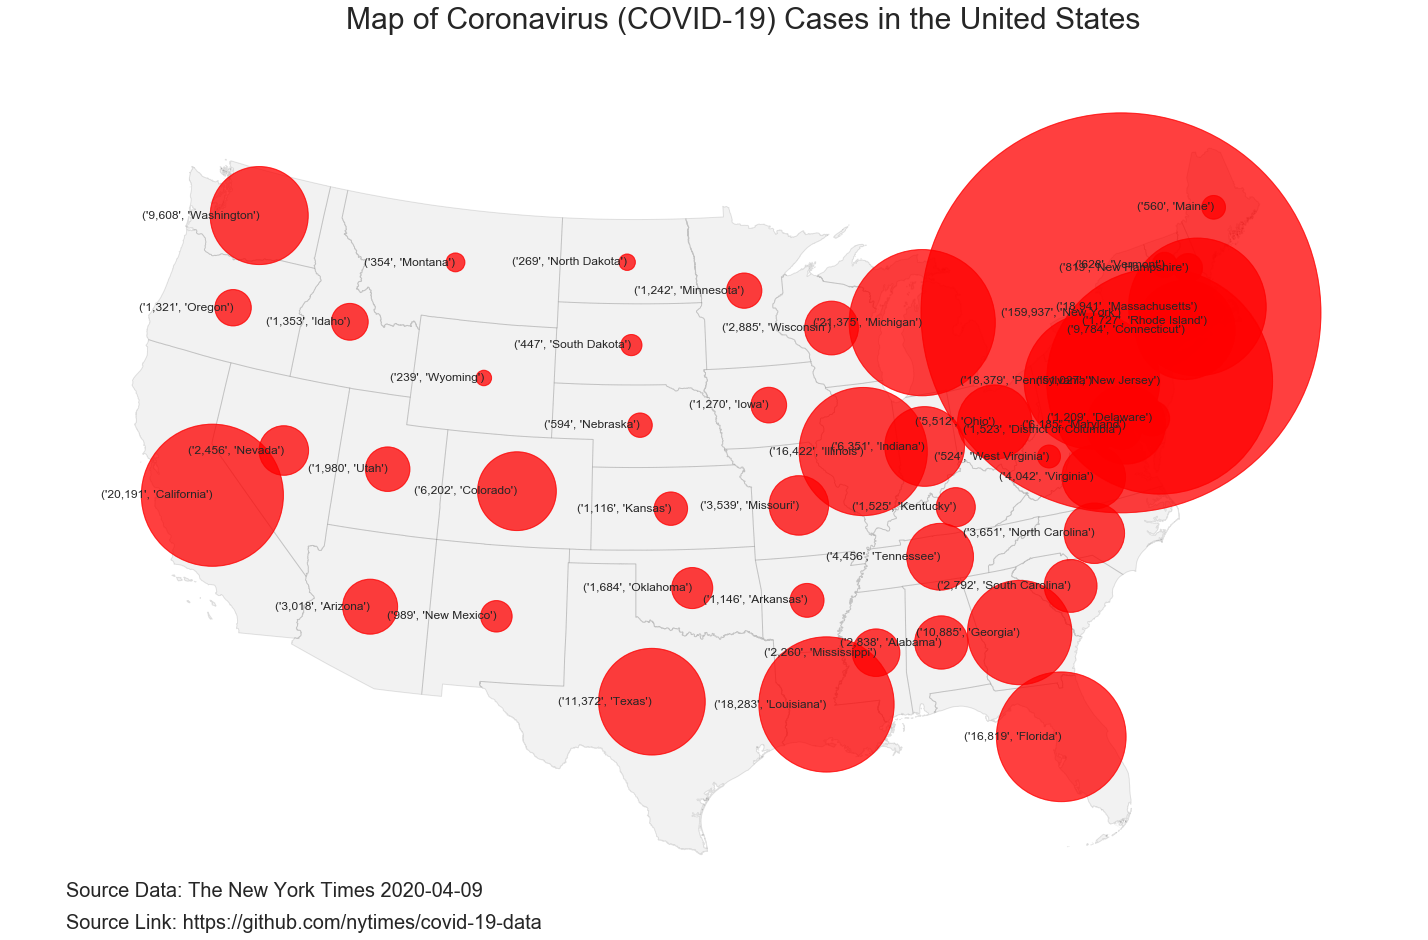

In [302]:
fig, ax = plt.subplots(figsize=(20,15))

states_shape_cases.plot(ax=ax, color='gray', edgecolor='black', alpha=.1)
state_points.plot(ax=ax, color='red', markersize=state_points['cases'], alpha=.5)

state_points.plot(ax=ax, color='red', markersize=state_points['cases'], alpha=.5)
for idx, row in state_points.iterrows():
    plt.annotate(s=('{:,}'.format(row['cases']), row['NAME']), xy=row['coords'],
                 horizontalalignment='right', va='center')
    
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
plt.figtext(0.05, 0.1, txt, wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.05, 0.07, txt2, wrap=True, horizontalalignment='left', fontsize=20)

ax.set_title('Map of Coronavirus (COVID-19) Cases in the United States', fontsize=30)
plt.axis('off')
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-state-map')

In [303]:
# # defining our plot
# plt.subplots(figsize=(20,15))
# ax = plt.subplot()

# fig = states_shape_cases.plot(column=("cases"), ax=ax, k=7, 
#                    scheme='fisher_jenks', label=True, legend=True, 
#                    legend_kwds={'loc': 'lower left', 'title': 'Number of COVID-19 Cases', 
#                    'title_fontsize': 'x-large','fontsize': 'x-large'}, 
#                    cmap='viridis', edgecolor='black')

# ax.set_title("Map of Number of Coronavirus (COVID-19) Cases in the United State by State", fontsize=30)
# txt = ('Source Data: The New York Times ' + current_date)
# txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
# txt3 = ('Choropleth Sheme: fisher_jenks')
# plt.figtext(0.2, 0.145, txt, wrap=True, horizontalalignment='left', fontsize=15)
# plt.figtext(0.2, 0.115, txt2, wrap=True, horizontalalignment='left', fontsize=15)
# plt.figtext(0.2, 0.175, txt3, wrap=True, horizontalalignment='left', fontsize=15)

# leg = fig.get_legend()
# leg._loc = 3

# for lbl in leg.get_texts():
#     label_text = lbl.get_text()
#     lower = label_text.split()[0]
#     upper = label_text.split()[2]
#     new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
#     lbl.set_text(new_text)

# plt.axis('off')
# plt.tight_layout()
# plt.savefig('figures/nyt-covid-19-data-state-map-choro')

In [304]:
covid_19_state_data.to_csv('data/us-states-raw-data.csv', index=False)
g.to_csv('data/us-states-grouped-day.csv')
bar.to_csv('data/us-states-grouped-states.csv')